<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Твой код выдает ошибку. Пожалуйста, посмотри, что пошло не так. Как исправишь неточность, присылай проект снова. Буду ждать :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что доделал задание:) Начнем с начала. Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделала большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Стоит делать краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

</div>

# Исследовательский анализ игровой индустрии

Задание: проанализировать данные, представляющие собой информацию об играх, игровых платформах, а также продажах этих игр с 1980-хх гг до 2016 г.

Данные представляют собой таблицу формата csv. со следующими столбцами: name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales,	critic_score, user_score, rating.

name - название игры;
platform -  платформа, для которой выпущена игра;
year_of_release -  год выпуска игры;
genre -  жанр игры;
na_sales -  продажи в Америке;
eu_sales -  продажи в Европе;
jp_sales - продажи в Японии;
other_sales - прочие продажи в мире;
critic_score - оценки критиков;
user_score - оценки пользователей;
rating - рейтинг игры ESRB.

Таблица имеет пропущенные данные. В работе заполняются пропущенные ячейки таблицы, анализируются продажи, их зависимость от рейтингов, от регионов и от прочих показателей. Рассчитывается жизненный цикл игровых платформ, проверяются статистчиеские гипотезы влияния различных факторов, исследуются распределения и корреляции переменных,  анализируется текущее состояние игровой индустрии.

# Импорт библиотек

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

In [20]:
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
%matplotlib inline  
#Вывод графиков в ячейках
import seaborn as sns # Импортируем библиотеку seaborn
sns.set_style('darkgrid') # Устанавливаем стиль графиков
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

# Шаг 3. Загрузка и предобработка данных

In [21]:
df = pd.read_csv('/datasets/games.csv')  #Загрузка таблицы

In [22]:
df.columns = [i.lower() for i in list(df.columns)]    #Приводим столбцы к нижнему регистру

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Данный метод позволяет нам автоматизировать процесс приведения названий столбцов к нижнему регистру. Так исключается вероятность опечаток. 

</div>

Общая информация по таблице

In [23]:
df.shape  #Размеры таблицы

(16715, 11)

In [24]:
df.head() #Первые строки таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [25]:
df.tail()     #Последние строки таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [26]:
df.info() #Информация по типам данных в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [27]:
df.isna().sum()   #Количество пустых ячеек

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

## Выводы
В таблице 16715 строк и 11 столбцов. Из них полностью заполнены : platform, na_sales, eu_sales, jp_sales, other_sales. В названии игр 2 пропуска, заполним их какими-нибудь именами game1, game 2. Год лучше перевести в целочисленный тип, пустые значения года будем заполнять средним значением года выпуска каждой платформы. к которой относится пустая ячейка. user_score лучше перевести в числовой тип, предварительно убрав мусорные ячейки


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

## Заполнение пустых ячеек

In [28]:
mask = df['name'].isna()
df.loc[mask,'name'] = ['game_1', 'game_2']    #Заполняем пустые значения столбца name случайцными названиями игр

Заполнение пустых годов выпуска - более сложная задача. Игры раcположены в таблице не в порядке хронологии. Была найдена такая закономернность - в таблице внизу указан средний год выпуска игр и стандартное отклонение в зависимости от платформы. Стандартные отклонения показывают, что игры на определенные платформы выпускались в определенный период,  поэтому заменяем пропущенное значение года игры средним значением года платформы, на которой игра выпускалась. 

In [29]:
df.dropna().groupby('platform').aggregate({'year_of_release':['mean','std']})    #Смотрим стандартыне отклонения года выпуска игры для каждой платформы

year_of_release          
                    mean       std
platform                          
3DS          2012.606061  1.636836
DC           2000.071429  0.730046
DS           2007.529161  1.568544
GBA          2002.861502  1.346742
GC           2003.327231  1.398070
PC           2009.054962  4.257036
PS           1999.464865  1.363383
PS2          2003.716863  2.103818
PS3          2010.070175  2.073333
PS4          2015.053942  0.922629
PSP          2007.125275  1.733233
PSV          2013.285714  1.438825
Wii          2008.458407  1.363319
WiiU         2013.666667  1.306853
X360         2009.399098  2.206782
XB           2003.631054  1.374022
XOne         2014.913043  0.983561

In [30]:
for i in list(df.platform.unique()):    #Шагаем по уникальным платформам
    
      mean_year = round(df[df.platform==i].year_of_release.mean())    #считаем средний год выпуска для каждой платформы
      temp = df.loc[df.platform==i,'year_of_release'].loc[df.loc[df.platform==i,'year_of_release'].isna()]    # создаем таблицу, выборку только с пропущенными значениями года
      indx = list(temp.index)   #берем из нее индексы пропущенных значений

      for j in indx:
        df.loc[j,'year_of_release']  = mean_year  #Шагаем по индексам пропущенных значений и вручную перебиваем каждую ячейку

In [31]:
df['year_of_release'] = pd.Series(df.year_of_release,dtype = 'int32')   #Переводим год в целочисленный тип данных

Жанры мы никак не можем предсказать, поэтому оставим ячейки пустыми, в дальнейших расчетах с жанрами эти 2 строки можно будет удалить. 

Оценки критиков заполнены наполовину. Не будем их заполнять медианными или средними значениями, поскольку это сильно повлияет на качество анализа, мы заранее не знаем успех фильма, это в принципе целевой показатель, но можно предсказать зависимость оценки критиков в зависимости от продаж, платформы, и оценок пользователей. Например с использовнаием линейной регрессии, либо нейронных сетей.

In [32]:
df['user_score'] = df.user_score.apply(lambda x: np.nan if x=='tbd' else x)     #Удалим tbd, заменим на пустые значения
df['user_score'] = df.user_score.astype(dtype = 'float64')                      #Оценки пользователей переведем в числовой тип данных

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

In [33]:
df['all_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales      #Суммарные продажи во всех регионах вставляем в отдельнй столбец

Заполним пустые ячейки оценок критиков предсказаниями нейронной сети. Полносвязная нейронная сеть ищет закономерности, в том числи и скрытые и не видимые глазу. В нецйронную сеть подаются столбцы год, платформа, продажи, название игры (она будет обрабатывать в том числе и текстовые символы), в качестве предсказания будут пропущенные значения оценок пользователей и критиков, а также рейтинг.

## Визуализации исходных распределений оценок фильмов, для общего представления

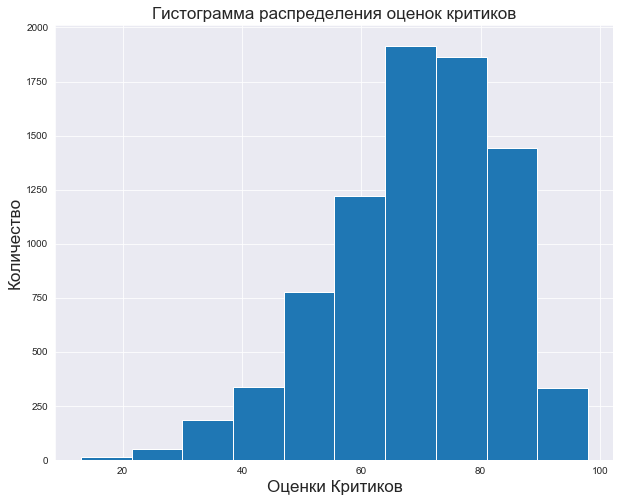

In [34]:
plt.figure(figsize = (10,8))
df.critic_score.hist()
plt.title('Гистограмма распределения оценок критиков', size = 17)
plt.xlabel('Оценки Критиков', size = 17)
plt.ylabel('Количество', size = 17)

plt.show()

In [35]:
print('Средняя оценка критиков',  df.critic_score.mean())
print('Медианная оценка критиков',df.critic_score.median())
print('Средняя оценка пользователей', df.user_score.mean()*10)
print('Медианная оценка пользователей',df.user_score.median()*10)

Средняя оценка критиков 68.96767850559173
Медианная оценка критиков 71.0
Средняя оценка пользователей 71.25046113307032
Медианная оценка пользователей 75.0


Медианная и средняя оценка критиков в целом ниже соответствующих оценок зрителей.

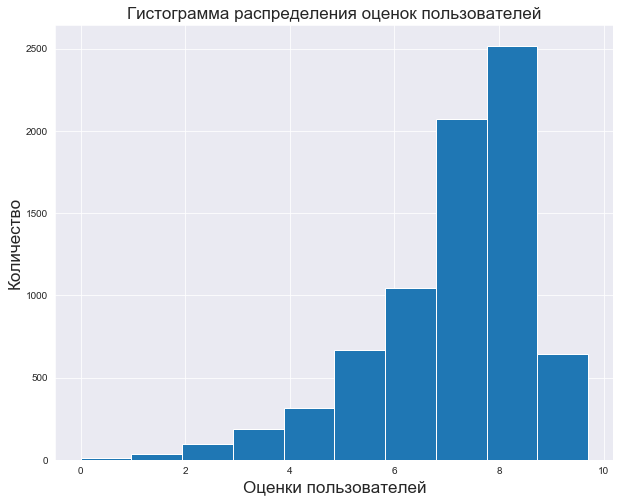

In [36]:
plt.figure(figsize = (10,8))
df.user_score.hist()
plt.title('Гистограмма распределения оценок пользователей', size = 17)
plt.xlabel('Оценки пользователей', size = 17)
plt.ylabel('Количество', size = 17)
plt.show()


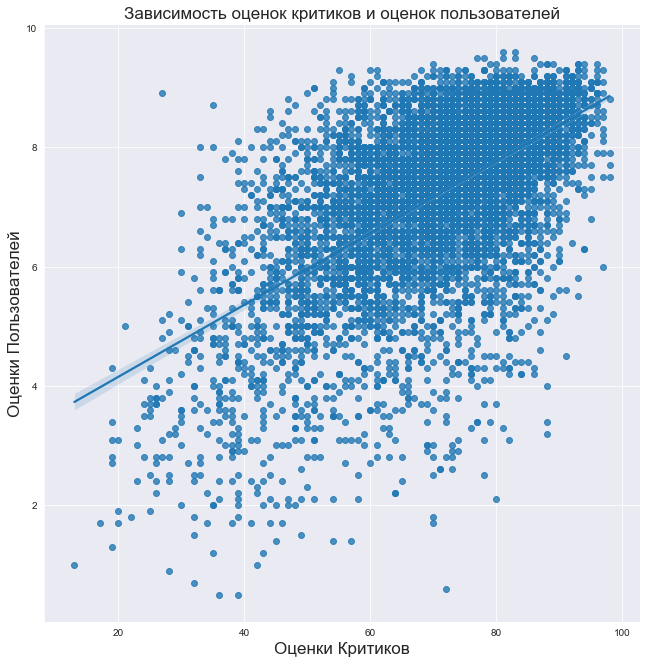

In [37]:

sns.lmplot(x ='critic_score' , y = 'user_score', data=df,height = 9)
#plt.scatter(df.critic_score, df.user_score)
plt.title('Зависимость оценок критиков и оценок пользователей', size = 17)
plt.xlabel('Оценки Критиков', size = 17)
plt.ylabel('Оценки Пользователей', size = 17)
plt.show()

Зависимость можно аппроксимировать линейной между оценкой критиков и пользователей.

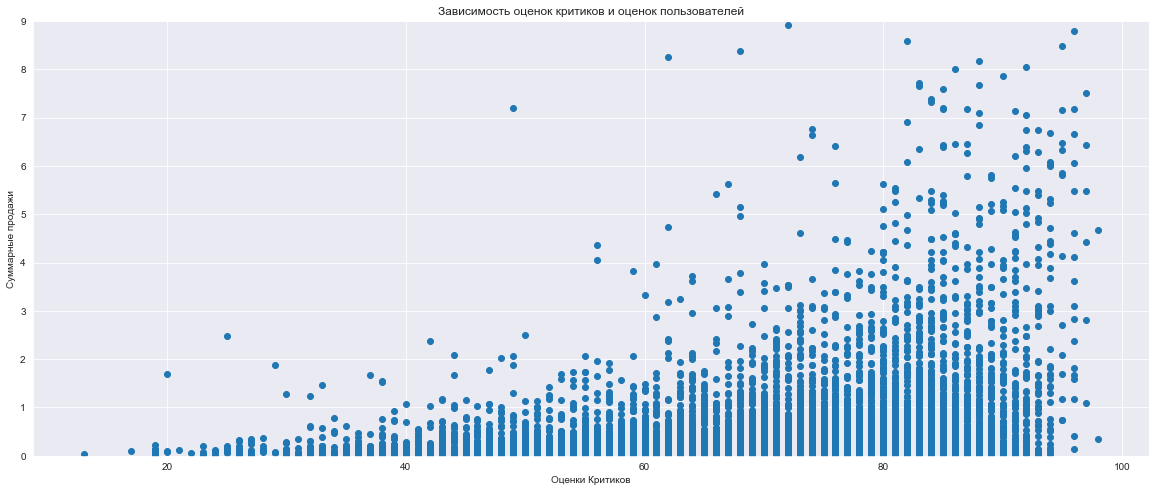

In [38]:
plt.figure(figsize = (20,8))
plt.scatter(df.critic_score, df.all_sales)
plt.title('Зависимость оценок критиков и оценок пользователей')
plt.xlabel('Оценки Критиков')
plt.ylabel('Суммарные продажи')
plt.ylim([0,9])
plt.show()


Здесь следующая закономерность налицо  - при малых оценках критиков продажи малые, их возможно аппроксимировать прфямой, однако в лучших фильмах, получивших высокие оценки критиков, большой разброс в 10 раз и выше, видимо на продажи влияют неи только качество оценок критиков, но и маркетинг, продажи, актерский состав. Даже хорошие фильмы, с менее звездным актерским составом получают меньшие продажи. Зависимость похожа на экспоненту или степенную функцию. Этой зависимостью объясняются высокие гонорары звезд:? в случае успеха фильма все окупится.

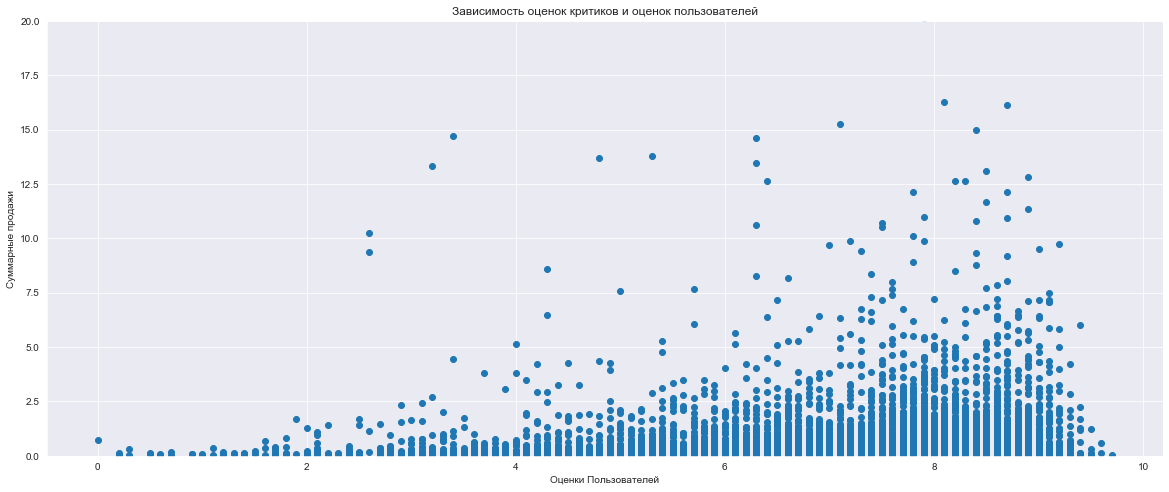

In [39]:
plt.figure(figsize = (20,8))
plt.scatter(df.user_score, df.all_sales)
plt.title('Зависимость оценок критиков и оценок пользователей')
plt.xlabel('Оценки Пользователей')
plt.ylabel('Суммарные продажи')
plt.ylim([0,20])
plt.show()


Зависимость продаж от оценок пользователй имеет более реальную зависимость и меньший разброс. Действителньо, именно оценки зрителей определяют продажи фильма. Однако даже отлично оцененые фильмы могут иметь мизерные продажи.

In [40]:
#Разделим собцы на категориальные и числовые, чтобы посмотрет раздельные статистики
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['name', 'platform', 'genre', 'rating']
['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'all_sales']


In [41]:
df[numerical_columns].describe()    #Статистика по числовым столбцам

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.472270,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.897158,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [42]:
df[categorical_columns].describe()       #Статистика по категориальным  столбцам

,name,platform,genre,rating
count,16715,16715,16713,9949
unique,11561,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,E
freq,12,2161,3369,3990


In [43]:
df.genre.unique()   #Количество уникальных жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [44]:
df.platform.unique()    #Количество уникальных платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [45]:
df.rating.unique()    #Уникальные рейтинги от организации

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [46]:
#Статистика по видам рейтинга фильмов от организации и количеству таких фильмов
df.groupby('rating',as_index=False).aggregate({'name':'count'}).rename(columns = {'name':'Количество', 'rating':'Рейтинг организации'})

,Рейтинг организации,Количество
0,AO,1
1,E,3990
2,E10+,1420
3,EC,8
4,K-A,3
5,M,1563
6,RP,3
7,T,2961


## Скорее всего такой вывод можно сделать относительно влияние оценок на продажи - качества филмьа недостаточно для хороший продаж. Нужны еще и другие составляющие, поскольку даже качественный фильм может собрать слабые продажи.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

# Шаг 4. Проведите исследовательский анализ данных


In [47]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

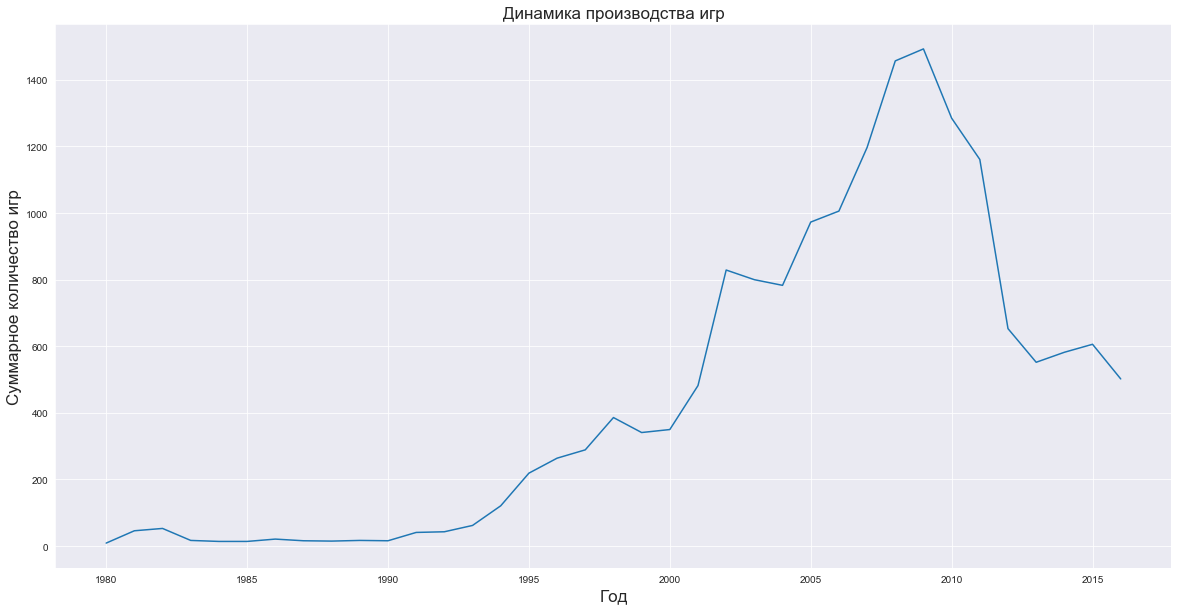

In [48]:
#Построение графика зависимости количества новых игр за каждый год от года
res = df.groupby('year_of_release',as_index=False).aggregate({'name':'count'})
plt.figure(figsize = (20,10))
plt.plot(res.year_of_release, res.name)
plt.xlabel('Год', size = 17)
plt.ylabel('Суммарное количество игр', size = 17)
plt.title('Динамика производства игр',  size = 17)
plt.show()

Начиная с 90-х годов пошел основной рост производства и популярности игр, поэтому до 1990 года не видно большого смысла рассматривать статистику. До 1990 г рынок и закономерности были другими. Основной рост 1990-2009 , и спад 2009 - 2016. В итоге 3 основных этапа в истории игр.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь,  с чем связан спад в индустрии последних лет?

</div>

## Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?

In [49]:
#Группируем суммарные продажи по каждой платформе
df1 = df.groupby('platform',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['all_sales'], ascending=False).reset_index().drop('index', axis = 1)
df1

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Построим график для первх 10 платформ, хотя по большому счету перве 6 платформ в таблице имеют высокие продажи, все остальные сильно отстают от них.

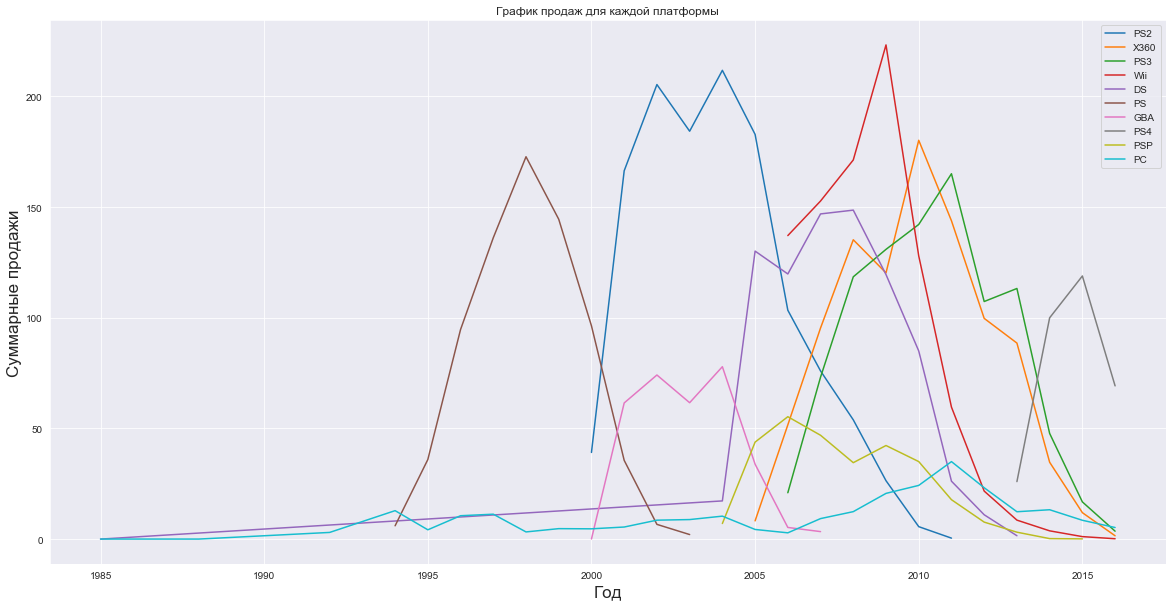

In [50]:
#График продаж по годам для каждой платформы
plt.figure(figsize = (20,10))
for i in range(df1.shape[0]):
    df2 = df[df.platform == df1.platform[i]].groupby('year_of_release',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['year_of_release'], ascending=True)
    plt.plot(df2.year_of_release, df2.all_sales, label = df1.platform[i])
    if i>8:
      break
plt.legend()
plt.xlabel('Год', size = 17)
plt.ylabel('Суммарные продажи', size = 17)
plt.title('График продаж для каждой платформы')
plt.show()

На графике выше изображены продажи платформ. У каждой платформы есть свой жизненный цикл. Чисто игровые платформы имеют короткий жизненный цикл, о днако наибольшие продажи, первоснальные компьютеры более универсальные, их продаже меньше, но они наиболее стабильные и меньше подвержены перепадам и резким скачкам.

Платформы, популярные в прошлом, у которых сейчас продажи на  нуле: PS, PS2, PS3, Wii - да почти все платформы. Они все просели о чень сильно. Только PS4 имеет неплохую популярность. Ну и PC не так сильно упало в сравнении с другими  топовыми платформами.

Рассчитаем период жизни платформы, а точнее рассчитаем периоды жизни каждой платформы и выведем статистику по данному распределению.

Введем метрику - будем считать окончанием времени жизни платформы падение продаж на 90% от пикового значения.

In [51]:
T = []  #В эту переменную будем заносить времена жизней платформ
M = []  #А в эту максимальные продажи (пик)
platforms = list(df.platform.unique())
for i in platforms:                 #Цикл считает расстояние в годах между началом и концом жизненного цикла платформы
    
    df1 = df[df.platform==i].copy()
    df1 = df1.groupby('year_of_release',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['year_of_release'], ascending=True)
    MAX = df1.all_sales.max()
    
    t1=0
    t2=0
    for j in range(df1.shape[0]):
      if j==0 and df1.all_sales[j]>=0.1*MAX:
          t1 = df1.year_of_release[j]
          break
      if df1.all_sales[j]>=0.1*MAX:
          t1 = df1.year_of_release[j]
          break
    for j in range(df1.shape[0]-1,0,-1):
        if j==df1.shape[0]-1 and df1.all_sales[j]>=0.1*MAX:
            t2 = df1.year_of_release[j]
            break
        if df1.all_sales[j]>=0.1*MAX:
            t2 = df1.year_of_release[j]
            break
    delta = t2-t1
    
    if delta>=0:
        print(f'Платформа {i}, начало жизни {t1} год, конец жизни {t2} год, итого {delta} лет.')
        if t2 < 2016:
            T.append(delta)
            M.append(MAX)
        else:
            print('В анализе ее не учитываем, поскольку время жизни не истекло')


Платформа Wii, начало жизни 2006 год, конец жизни 2011 год, итого 5 лет.
Платформа NES, начало жизни 1983 год, конец жизни 1991 год, итого 8 лет.
Платформа GB, начало жизни 1989 год, конец жизни 2001 год, итого 12 лет.
Платформа DS, начало жизни 2004 год, конец жизни 2011 год, итого 7 лет.
Платформа X360, начало жизни 2006 год, конец жизни 2014 год, итого 8 лет.
Платформа PS3, начало жизни 2006 год, конец жизни 2015 год, итого 9 лет.
Платформа PS2, начало жизни 2000 год, конец жизни 2009 год, итого 9 лет.
Платформа SNES, начало жизни 1990 год, конец жизни 1996 год, итого 6 лет.
Платформа GBA, начало жизни 2001 год, конец жизни 2005 год, итого 4 лет.
Платформа PS4, начало жизни 2013 год, конец жизни 2016 год, итого 3 лет.
В анализе ее не учитываем, поскольку время жизни не истекло
Платформа 3DS, начало жизни 2011 год, конец жизни 2016 год, итого 5 лет.
В анализе ее не учитываем, поскольку время жизни не истекло
Платформа N64, начало жизни 1996 год, конец жизни 2000 год, итого 4 лет.
Пла

In [52]:
len(T)

22

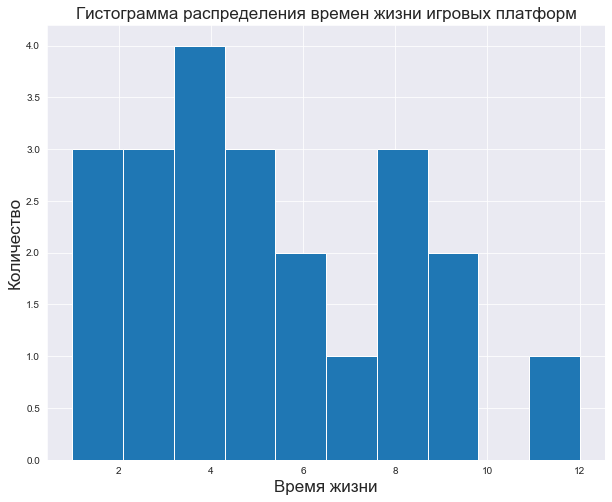

In [53]:
plt.figure(figsize = (10,8))
plt.hist(T, bins=10)
plt.title('Гистограмма распределения времен жизни игровых платформ', size = 17)
plt.xlabel('Время жизни', size = 17)
plt.ylabel('Количество', size = 17)
plt.show()

Подавляющее число платформ (упешных и нет) живет от 2 до 9 лет.

Построим зависимость времени жизни от успеха платформы, от максимального сбора

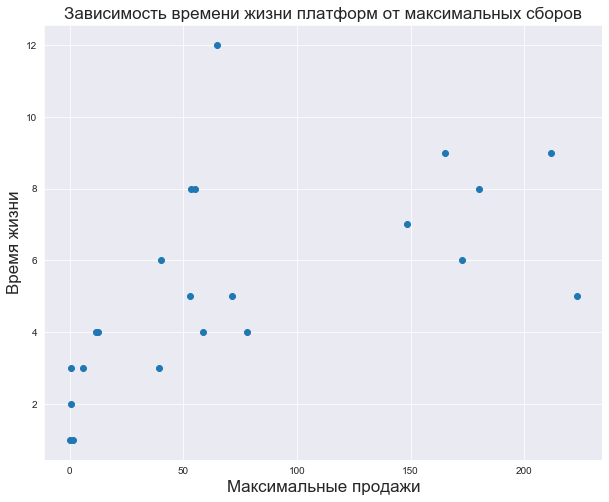

In [54]:
plt.figure(figsize = (10,8))
plt.scatter(M,T)
plt.title('Зависимость времени жизни платформ от максимальных сборов', size = 17)
plt.ylabel('Время жизни', size = 17)
plt.xlabel('Максимальные продажи', size = 17)
plt.show()

Получилась очень интересная зависимость, похожая на логарифм. Чем больше максимальные продажи, тем дольше время жизни. Однако зависимость не линейная, она стремится к какому-то пределу, что логично. Какой бы успешной игра не была,люям она приедается и рано или поздно интерес к ней спадает. Так же и платформы - прогресс развивается, пояляются новые технологии, которые вытесняют старые, даже самые успешные платформы не могу вечно быть в ТОПе.

Еще интересная закономерность - есть 2 крупных кластера платформ. 6 наиболее успешных платформ с максимальным оборотом более 150, и множество мелких с максимальными оборотами менее 100. Есть выбросы - единичные игры, расположеные в переходных экстремальных зонах.

In [55]:
res_max=[]
res_min=[]
for i in range(len(T)):
    if M[i]>=130:
      res_max.append(T[i])

    if M[i] <=100:
      res_min.append(T[i])

print(f'Характерное время жизни для топовых платформ равно {round(np.array(res_max).mean(), 1)} лет')
print(f'Характерное время жизни для мелких платформ равно {round(pd.Series(res_min).median(), 1)} лет')

Характерное время жизни для топовых платформ равно 7.3 лет
Характерное время жизни для мелких платформ равно 4.0 лет


В итоге: топовые платформы живут более 7 лет, аутсайдеры порядка 4 лет, если рассчитывать с учетом нашей метрики падения продаж более чем на 90% от пика

***  В анализе периода жизни платформ мы не учитываем платформы, актуальные на 2016 год, посколкьу их время жизни может быть гораздо выше. Из 26 платформ в анализе участвовали 22. ***

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако, как ты верно заметила, актуальные платформы существуют. Анализировать их не стоит, т.к. период их жизни еще будет увеличиваться. 

</div>

## Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году

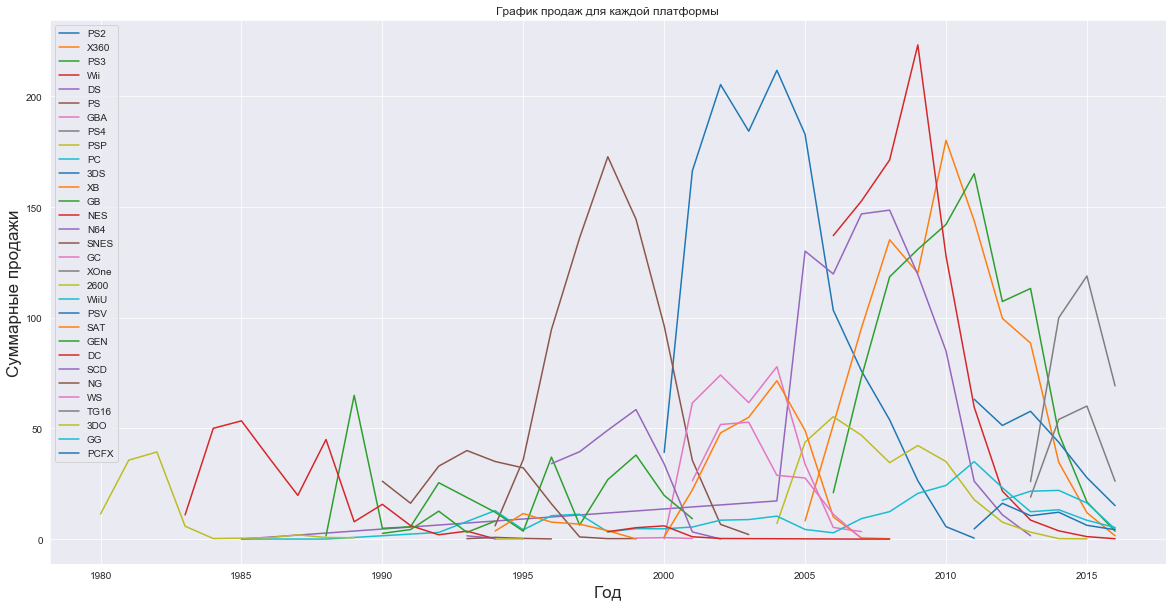

In [56]:
df1 = df.groupby('platform',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['all_sales'], ascending=False).reset_index().drop('index', axis = 1)
#График продаж по годам для каждой платформы
plt.figure(figsize = (20,10))
for i in range(df1.shape[0]):
    df2 = df[df.platform == df1.platform[i]].groupby('year_of_release',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['year_of_release'], ascending=True)
    plt.plot(df2.year_of_release, df2.all_sales, label = df1.platform[i])
    
plt.legend()
plt.xlabel('Год', size = 17)
plt.ylabel('Суммарные продажи', size = 17)
plt.title('График продаж для каждой платформы')
plt.show()

In [57]:
#Целевой период начнется начиная с этой даты, как появление новых платформ и до 2016 г:
df[df.platform == 'PS4'].year_of_release.min()

2013

Поскольку многие платфрмы исчезли в конце 2000-х годов, не будем расчсматривать период до 2009, чтобы не искажать распределение текущих годов. Определипли целевой период с 2008 по 2016 гг. Изобразим скорректированный график и скорректируем таблицу, удалив статистику до 2013 года, как требуется в задании

In [58]:
df = df[df.year_of_release>=2013].copy()    #Оставляет только те данные, которые младше 2012 года

** Таким образом оставили года младше 2012, то есть начиная с 2013 г, чтобы изучить конечный интервал развития индустрии. ** 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Лучше его уменьшить. Сейчас у тебя в периоде содержится 2 этапа развития индустрии: пик 2008 и 2009 годов, а также сокращение рынка последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

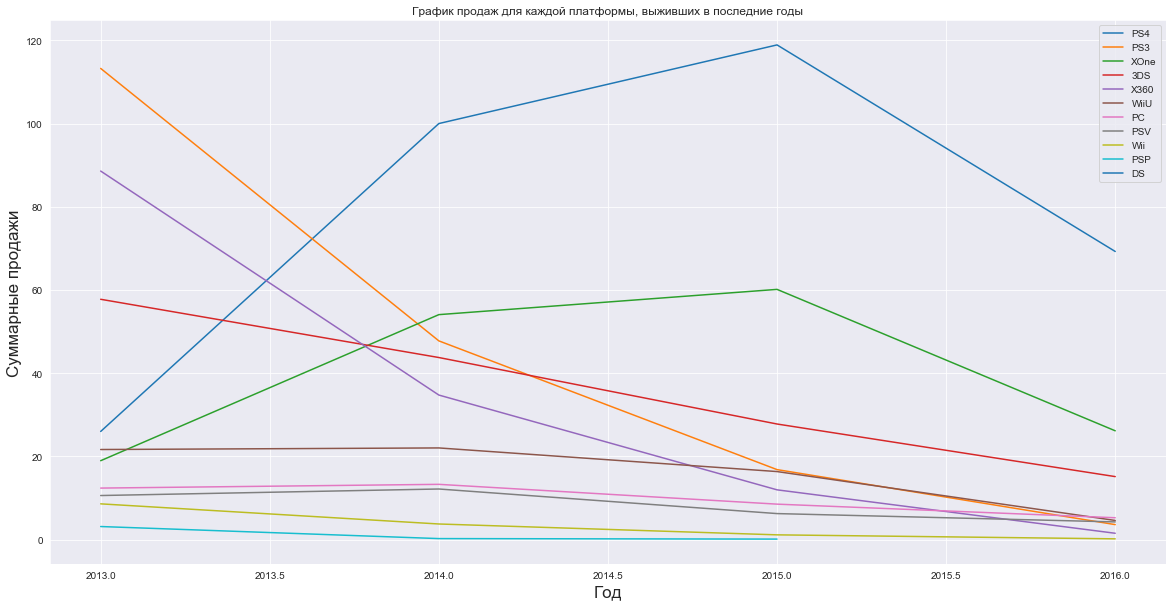

In [59]:
df1 = df.groupby('platform',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['all_sales'], ascending=False).reset_index().drop('index', axis = 1)
#График продаж по годам для каждой платформы
plt.figure(figsize = (20,10))
for i in range(df1.shape[0]):
    df2 = df[df.platform == df1.platform[i]].groupby('year_of_release',as_index=False).aggregate({'all_sales':'sum'}).sort_values(['year_of_release'], ascending=True)
    plt.plot(df2.year_of_release, df2.all_sales, label = df1.platform[i])
    
plt.legend()
plt.xlabel('Год', size = 17)
plt.ylabel('Суммарные продажи', size = 17)
plt.title('График продаж для каждой платформы, выживших в последние годы')
plt.show()

На этом рисунке скорректированный график за вычетом умерших платформ

In [60]:
df.platform.unique()    #Оставшиеся живые платформы на 2015-2016 гг.

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Выведем платформы в порядке убывания прибыли за 2015-2016 гг

In [61]:
df1 = df[df.year_of_release >= 2015].copy()


In [62]:
df1.groupby('platform', as_index=False).aggregate({'all_sales':sum}).sort_values(['all_sales'], ascending=False).reset_index().drop('index', axis = 1)

,platform,all_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50
8,Wii,1.32
9,PSP,0.12


Таким бразом за последние 2 года есть явный лидер PS4, на уверенном втором месте идет XOne, и так же на уверенном 3 месте 3DS

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

## Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Все платформы падают: выведем таблицу прибыльностей по годам для каждой платформы:

In [63]:
#сгруппируем продажи по годам для каждой платформы
df1 = df.pivot_table(index= 'platform', columns = 'year_of_release', values= 'all_sales', aggfunc='sum', fill_value = 0).copy()
df1

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,57.76,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,0.00
PSV,10.59,12.16,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


За последний год конечно все упало, даже за 2 года, лишь XOne вырос с 2014 по 2015

In [64]:
#Шагаем по ячейкам нашей таблицы и считаем на сколько % растет или падает оборот по сравнению с предыдущим годом у конкретной платформы
df2 = df1.copy()
for i in range(0,11):
    for j in range(1,4):
      temp = df1.iloc[i,j-1]
      if df1.iloc[i,j-1]==0:
          temp = 0.001
      if df1.iloc[i,j-1] ==df1.iloc[i,j]:
           df2.iloc[i,j] = 0
      else:
           df2.iloc[i,j] = (df1.iloc[i,j] - df1.iloc[i,j-1])/df1.iloc[i,j-1]*100

df2 = df2.iloc[:,1:]
df2

year_of_release,2014,2015,2016
platform,,,
3DS,-24.238227,-36.517367,-45.500360
DS,-100.000000,0.000000,0.000000
PC,7.269790,-35.843373,-38.380282
PS3,-57.827815,-64.782245,-78.596908
PS4,284.763371,18.900000,-41.757780
PSP,-92.356688,-50.000000,-100.000000
PSV,14.825307,-48.601974,-32.000000
Wii,-56.344587,-69.600000,-84.210526
WiiU,1.755196,-25.783023,-71.865443


In [65]:
df2.shape

(11, 3)

Графики продаж в процентах:

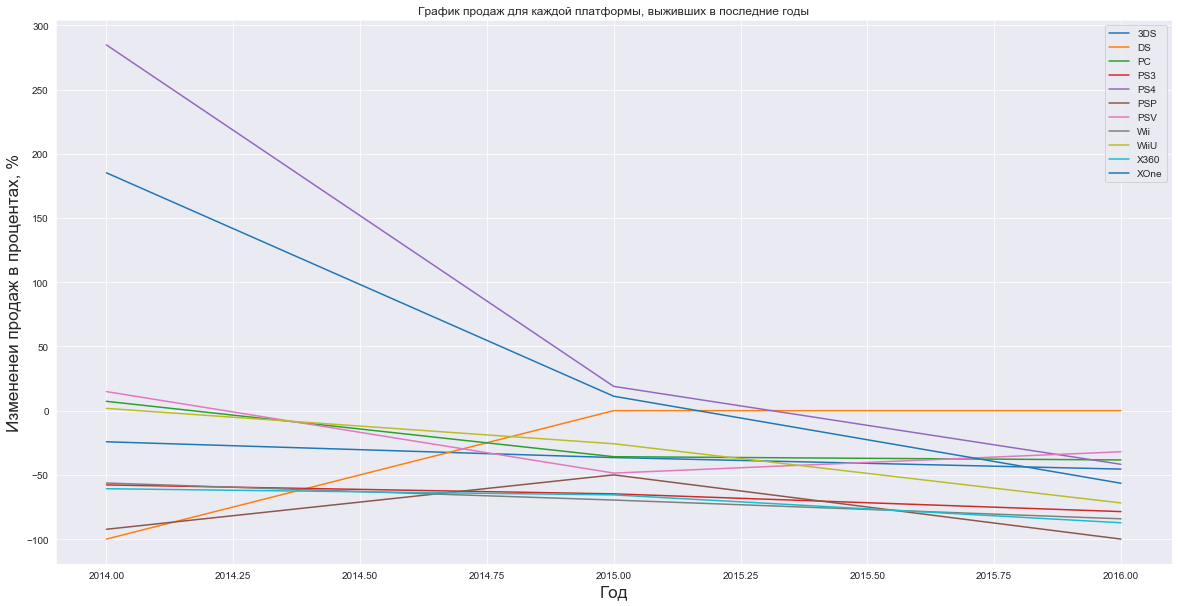

In [66]:
#Строим график изменения продаж в %
x = list(range(2014,2017))
plt.figure(figsize = (20,10))
for i in range(df2.shape[0]):
    y = df2.iloc[i,:] 
    plt.plot(x,y, label = df2.index[i])
    
plt.legend()
plt.xlabel('Год', size = 17)
plt.ylabel('Измененеи продаж в процентах, %', size = 17)
plt.title('График продаж для каждой платформы, выживших в последние годы')
plt.show()

Если смотреть относительные продажи, то платформа PSV меньше всех упала, по сравнению с другимии платформами. Если учитывать абсолютные продажи, то PS4, XOne, 3DS

## Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат

In [67]:
#Выведем таблицу глобальных продаж каждой игры и отсортируем по убыванию, выведем топ 20 игр
df1 = df.groupby('name', as_index=False).aggregate({'all_sales':'sum'}).sort_values('all_sales', ascending = False).reset_index().drop(columns = 'index')
df1.head(20)

,name,all_sales
0,Grand Theft Auto V,56.58
1,Call of Duty: Ghosts,27.39
2,Call of Duty: Black Ops 3,25.67
3,Minecraft,24.16
4,Call of Duty: Advanced Warfare,21.97
5,FIFA 15,17.37
6,FIFA 14,16.46
7,FIFA 16,16.30
8,Pokemon X/Pokemon Y,14.60
9,Battlefield 4,13.94


In [68]:
df.shape

(2242, 12)

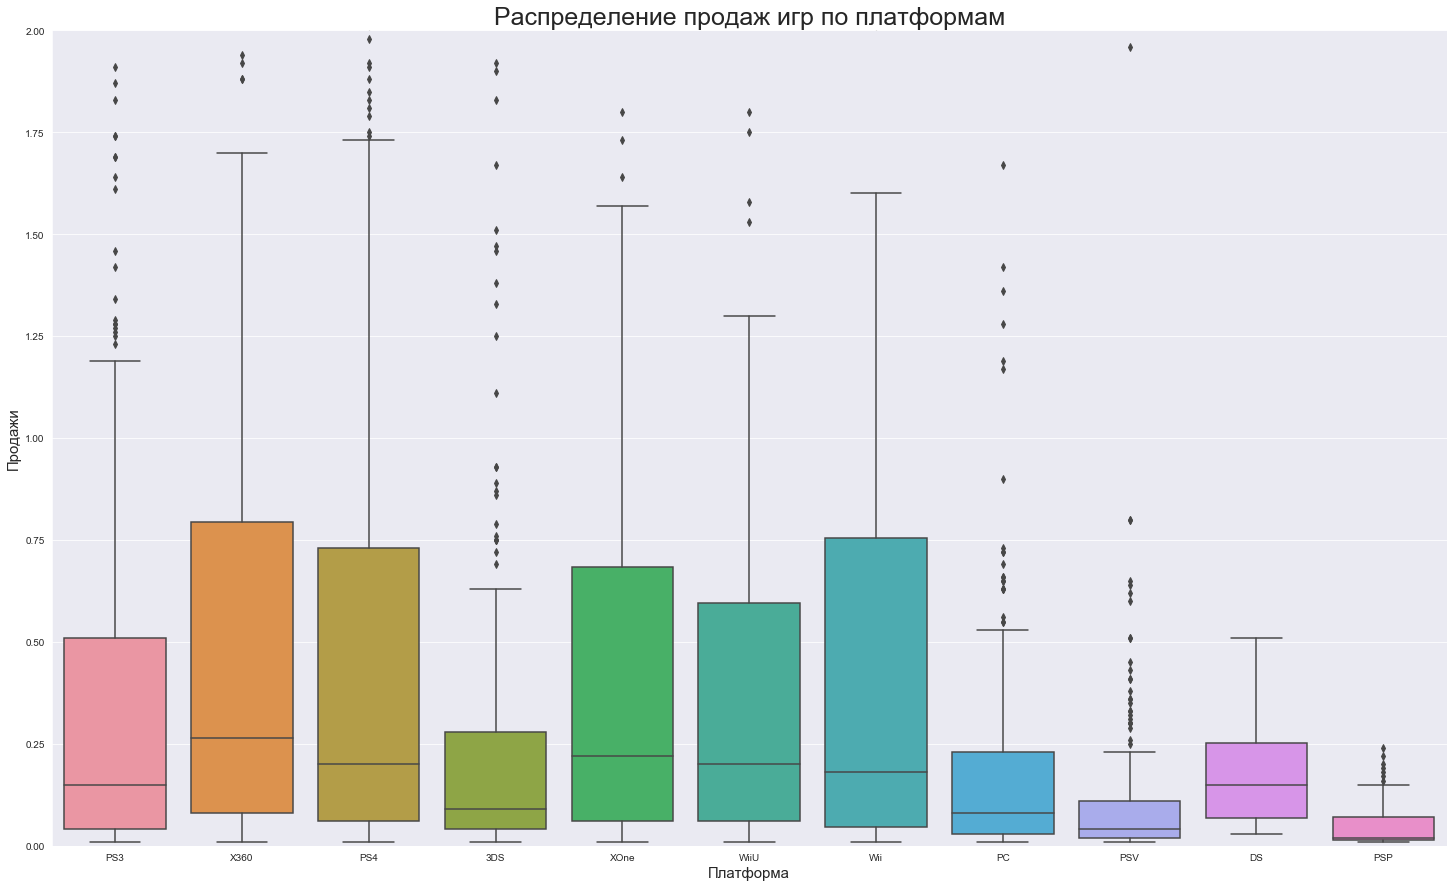

In [69]:
plt.figure(figsize=(25,15))

sns.boxplot(data=df,  y = 'all_sales', x = 'platform',  orient='v')
plt.title('Распределение продаж игр по платформам', size = 25)
plt.xlabel('Платформа', size = 15)
plt.ylabel('Продажи', size = 15)
plt.ylim([0,2])
plt.show()

На графике представлены распределения годовых продаж по каждой платформе за весь отчетный период с 2008 года. 

Ящик с усами показывает области сосредоточения наибольшего количества экзмпляров. Центральная линия - медиана распределени, верх и низ прямоугольника - 1/2 всех наблюдений. Усы - квантили расперджелений. точки - выбросы. Посколкьу были как успешные годы так и провальные, много выбросов

Несмотря на наличие флагманских игр, они являются выбросами и выбиваются из общей совокупности, их следует рассматрвиать отдельно. Основная масса игр имеет схожие распределения. Так, можно выделить в первый кластер следующие платформы: X360, PS3, PS4, XOne. У них схожие характеристики., сопоставимые прибыльности игр. Однако медианная прибьльность у X360 все таки выше. Платформы семейства PS*** берут количеством, они и меют рекордне суммарные проадажи благодаря обилию игр, но как видим медианные доходности у них равны прмерно. Более того новейшая PS4 имеет самую низкую медианную доходность с 1 игры.

Следующий кластер - Wii, 3DS -  делят второе место

Аутсакйдеры по средней дорходности - PC, PSP, PSV. На этих платформах производители игр зарабатывают меньше всего, и скорее всего менее охотно производят игры для этих платформ, что показывали графики сверху в ранних заданиях.

Построим схожий график, но уже для суммарных продаж каждой игры за все годы с 2008 года. Для этого модифицируем таблицу

In [70]:
#Считаем суммарные продажи каждой игры за последние годы
df1 = df.groupby(['name', 'platform'], as_index=False).aggregate({'all_sales':'sum'})
df1

,name,platform,all_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
4,Haikyu!! Cross Team Match!,3DS,0.04
...,...,...,...
2237,Zumba Fitness: World Party,Wii,0.23
2238,Zumba Fitness: World Party,XOne,0.24
2239,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05
2240,htoL#NiQ: The Firefly Diary,PSV,0.01


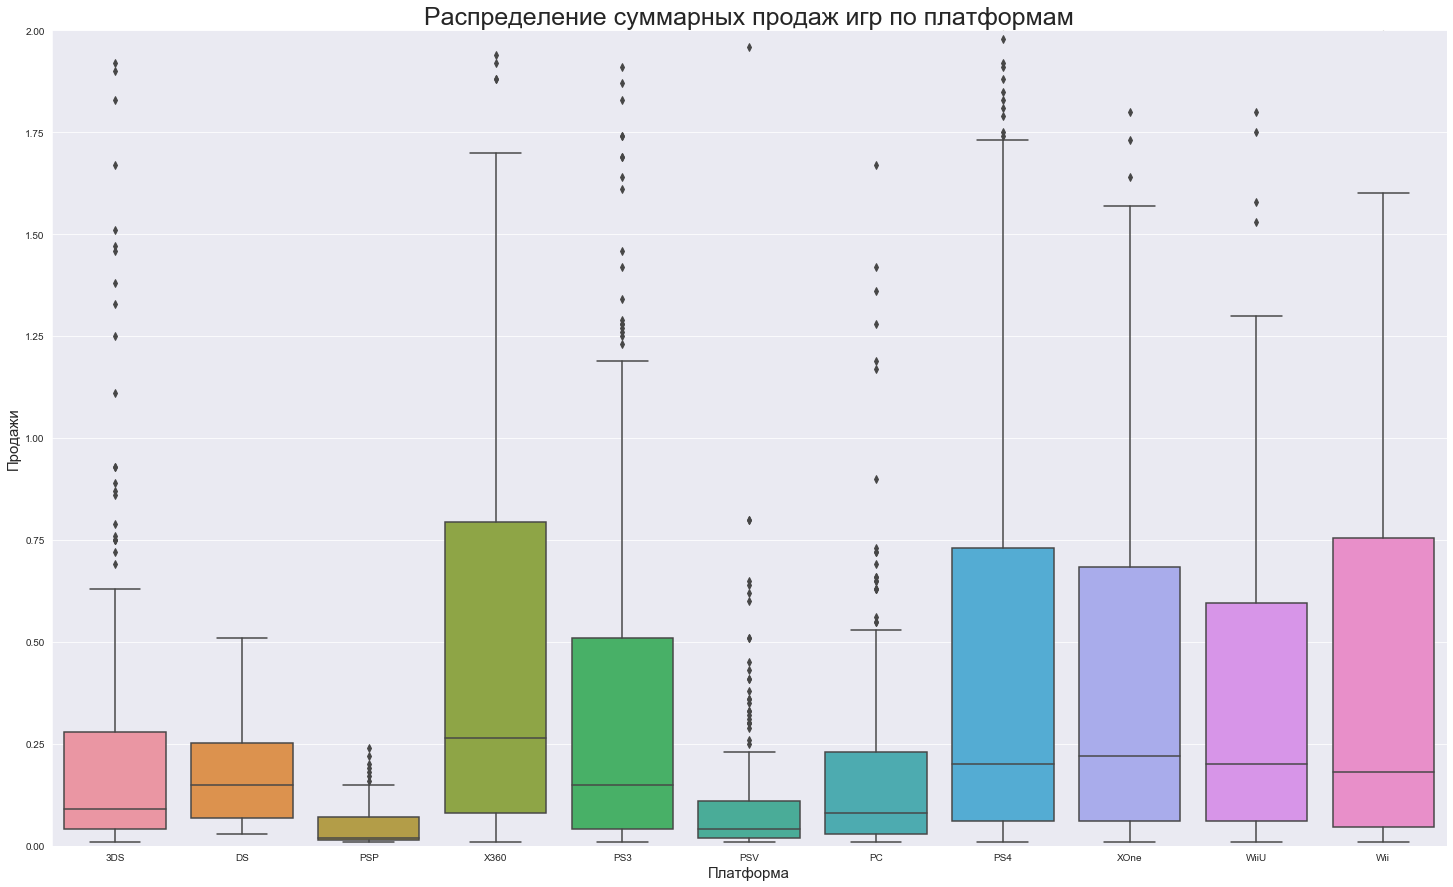

In [71]:
plt.figure(figsize=(25,15))

sns.boxplot(data=df1,  y = 'all_sales', x = 'platform',  orient='v')
plt.title('Распределение суммарных продаж игр по платформам', size = 25)
plt.xlabel('Платформа', size = 15)
plt.ylabel('Продажи', size = 15)
plt.ylim([0,2])
plt.show()

Если брать суммарыне продажи за 9 лет, тот тут интересная ситуация:Лидеры по медианной доходности  PS3, X360. Затем идут Wii, PS4, XOne, WiiU. Ну и дальше все остальные. Опять же, есть разные игры - супер успешные, простые и слабые, поэтмоу много выбросов.

Построим ящик с усами для всех игр вне зависимости от платформ:

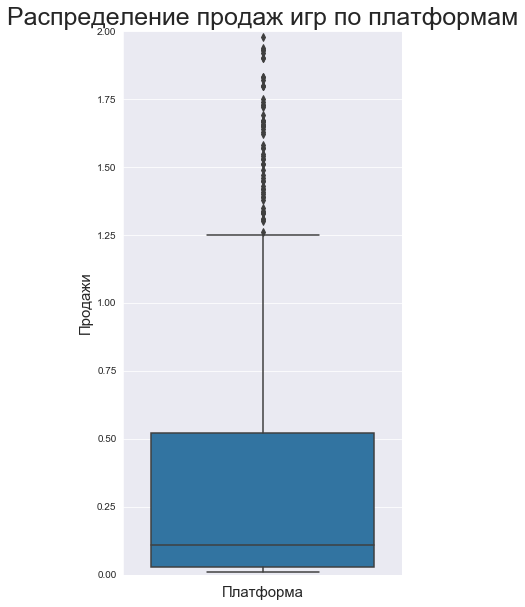

In [72]:
df1 = df.groupby('name', as_index=False).aggregate({'all_sales':'sum'})   #Считаем сумму продаж по каждой игре
plt.figure(figsize=(5,10))

sns.boxplot(data=df1,  y = 'all_sales',  orient='v')
plt.title('Распределение продаж игр по платформам', size = 25)
plt.xlabel('Платформа', size = 15)
plt.ylabel('Продажи', size = 15)
plt.ylim([0,2])
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Построим графики диаграмм расеяния для всех платформ:

In [73]:
#Выстроим платформы в порядке убывания популярности  и продаж

platforms = list(df.groupby('platform', as_index=False).aggregate({'all_sales':'sum'}).sort_values('all_sales', ascending = False).platform)
platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

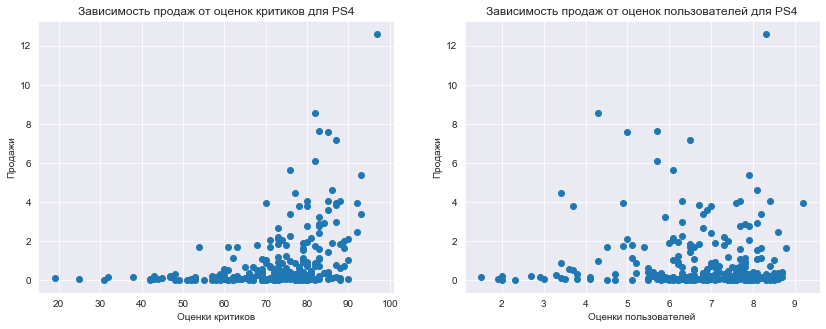

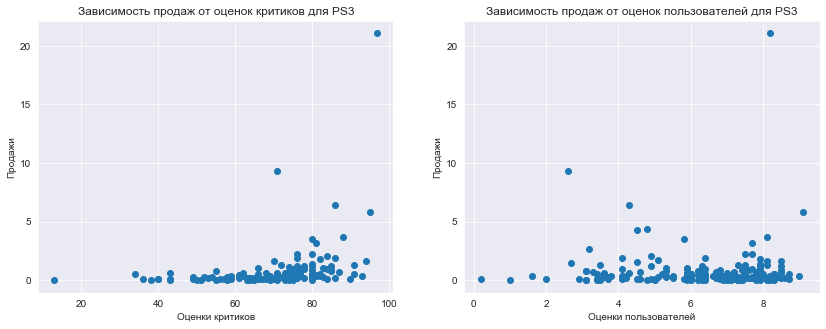

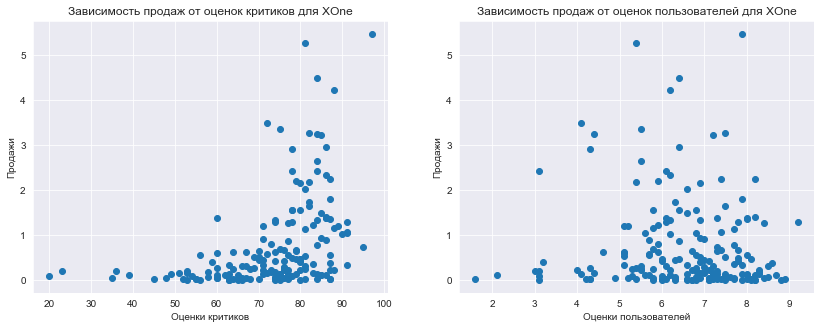

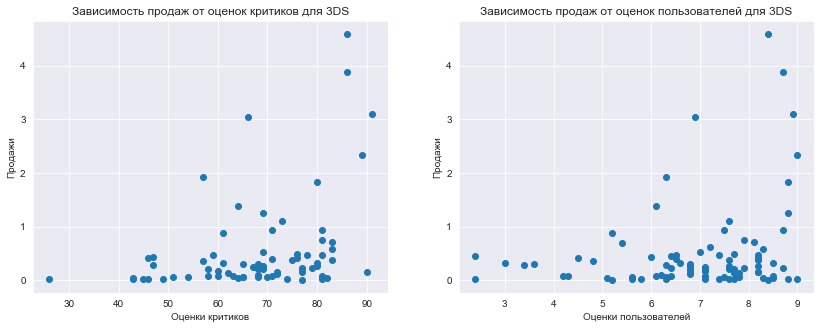

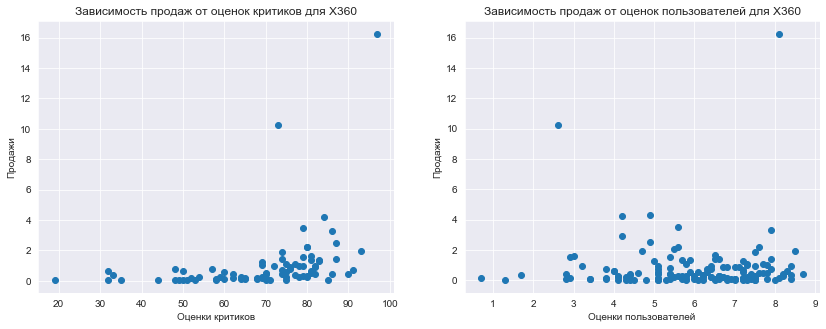

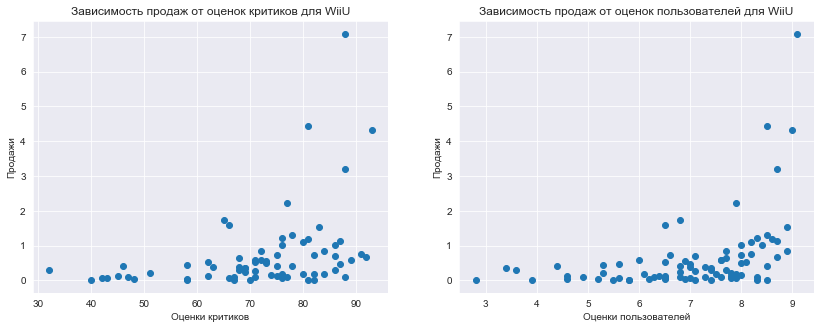

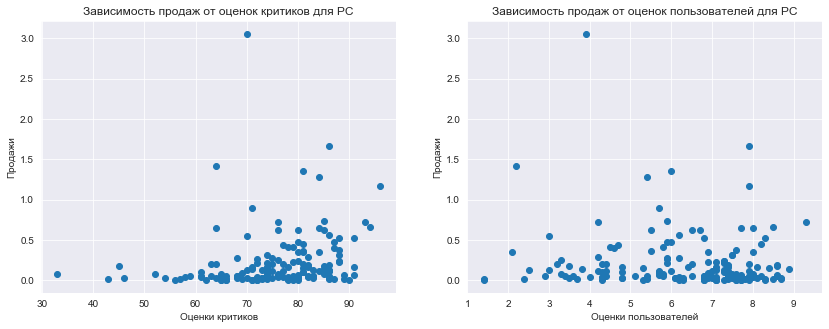

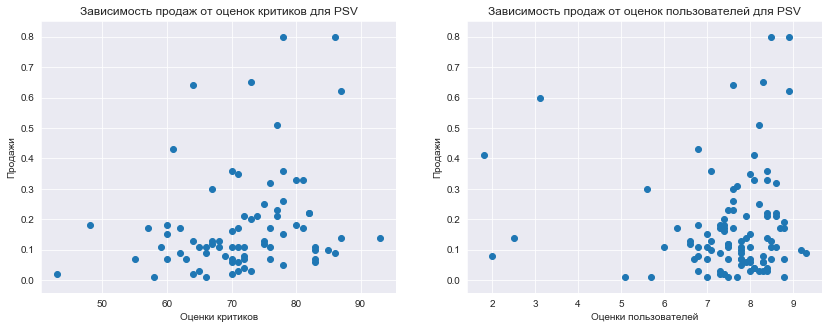

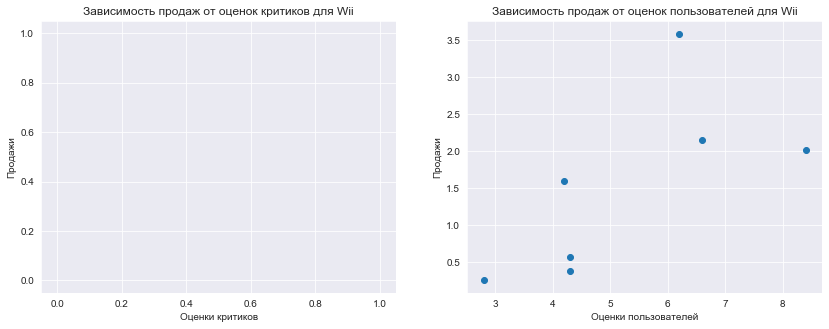

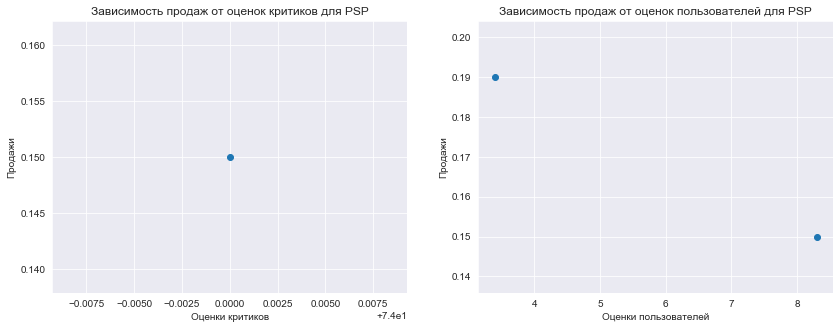

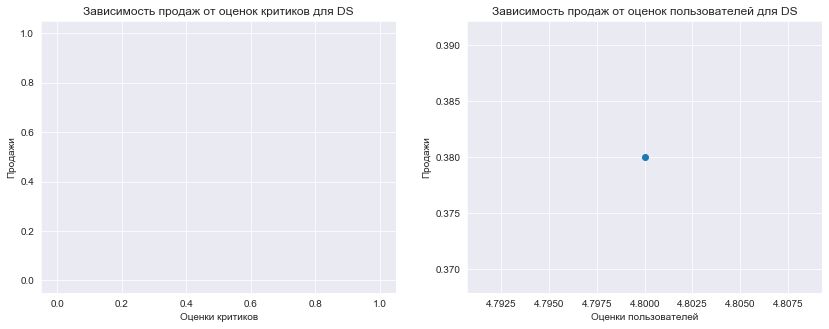

In [74]:

for i in platforms:
    df1  = df[df.platform == i].copy()
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    plt.scatter(df1.critic_score, df1.all_sales)
    plt.title(f'Зависимость продаж от оценок критиков для {i}')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки критиков')
    plt.subplot(1,2,2)
    plt.scatter(df1.user_score, df1.all_sales)
    plt.title(f'Зависимость продаж от оценок пользователей для {i}')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки пользователей')
    plt.show()

На графиках выше изображены зависимости продаж от оценок критиков и пользователей. Графики выводились в таком порядке, чтобы снакчала шли самые популярные платформы, и затем в порядке убывания популярности.

Что бросается в глаза: у платформ с меньшей популярностью отсутствует как таковая линейная зависимость продаж от оценок критиков. это отчетливо видно на графикаъх XOne и PSV.  Самые лучшие продажи у фильмов с высокими оценками.

Однако, как раньше упоминалось в данном отчете недостаточно оценки критиков чтобы фимльм был коммерчески уцспешен. Об этом свидетельствуют огромное колчиество примеров с отличными оценками но мизерными продажами. На успех фи льма явно влияют другие факторы, не указанные в таблице.

Посчитаем корреляцию между отзывами и продажами.

In [75]:
df11 = df.loc[:,['all_sales','critic_score']].dropna()
df12 = df.loc[:,['all_sales','user_score']].dropna()
kor1 = 0
kor2 = 0
kor1 = round(np.corrcoef(df11.all_sales, df11.critic_score)[0][1]*100)
kor2 = round(np.corrcoef(df12.all_sales, df12.user_score)[0][1]*100)
print(f'GПо всем платформам: корреляция продажи-критики: {kor1}%,  корреляция продажи-пользователи: {kor2}%,') 

GПо всем платформам: корреляция продажи-критики: 31.0%,  корреляция продажи-пользователи: -0.0%,


In [76]:
#Проверим корреляцию с учетом уровня значимости
#H0: два образца независимы.
#H1: существует зависимость между образцами.



pearsonr(df11.all_sales, df11.critic_score)

#p-value <0.05, отвергаем нулевую гипотезу. Зависимость существует. Сила зависимости - 0.29

(0.3137995163739338, 3.742386414404852e-24)

In [77]:
for i in platforms:
    df1  = df[df.platform == i].copy()
    df11 = df1.loc[:,['all_sales','critic_score']].dropna()
    df12 = df1.loc[:,['all_sales','user_score']].dropna()
    kor1 = 0
    kor2 = 0
    if i not in ['Wii', 'PSP', 'DS']:
        kor1 = round(np.corrcoef(df11.all_sales, df11.critic_score)[0][1]*100)
        kor2 = round(np.corrcoef(df12.all_sales, df12.user_score)[0][1]*100)
        print(f'Платформа {i}: корреляция продажи-критики: {kor1}%,  корреляция продажи-пользователи: {kor2}%,')    

Платформа PS4: корреляция продажи-критики: 41.0%,  корреляция продажи-пользователи: -3.0%,
Платформа PS3: корреляция продажи-критики: 33.0%,  корреляция продажи-пользователи: 0.0%,
Платформа XOne: корреляция продажи-критики: 42.0%,  корреляция продажи-пользователи: -7.0%,
Платформа 3DS: корреляция продажи-критики: 36.0%,  корреляция продажи-пользователи: 25.0%,
Платформа X360: корреляция продажи-критики: 35.0%,  корреляция продажи-пользователи: -1.0%,
Платформа WiiU: корреляция продажи-критики: 38.0%,  корреляция продажи-пользователи: 42.0%,
Платформа PC: корреляция продажи-критики: 20.0%,  корреляция продажи-пользователи: -9.0%,
Платформа PSV: корреляция продажи-критики: 26.0%,  корреляция продажи-пользователи: 0.0%,


Как видим, критики более точно предсказывают успех игры, однако все корреляции меньше 50%, что говорит о слабой линейной зависимости

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Почему фильма, если мы работаем с играми?)

</div>

Высислим тип зависимости для всех платформ для оценок критиков:

In [78]:
res = {}
df1 = df.loc[:,['all_sales','critic_score']].dropna()
x = df1.all_sales
y = df1.critic_score
for i in range(-1000,1000,10):
    x = df1.all_sales
    st = (float(i)/100)
    #print(st)
    x = x**st



    kor = 0
    if st !=0:
      kor = round(np.corrcoef(x, y)[0][1]*100)
      res[i] = kor

max = 0
for i in res:
    if abs(res[i]>max):
        max = res[i]
        imax = i

print(f'Таким образом зависимость продаж от оценок критиков выглядит x ^ {imax}. При этом корреляция равна {max}')
print(f'Просто подобрав тип зависимости мы смогли подобрать функциональную зависимость и поднять коррелцию с 29% до {max}%')

Таким образом зависимость продаж от оценок критиков выглядит x ^ 20. При этом корреляция равна 42.0
Просто подобрав тип зависимости мы смогли подобрать функциональную зависимость и поднять коррелцию с 29% до 42.0%


Аналогично ищется зависимость отдельно для критиков и пользователей. Почему такая высокая степень зависимости? думаю из-за выбросов. Они вносят наибольший вклад в корреляцию поэтому коэффицйиент корреляции подстраивается под них

Резюмируем вывыоды: В популярных платформах играют роль оценки критиков и потзователей. Продажи растут просто экспоненциально сопоставимо со степенью числа 30. В менее популярных платформах зависимости похуже либо отсутствуют. Возможно это связано с тем что меньше людей читаю отзывы критиков перед покупкой игры. Скорее фанаты платформ.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Здорово, что рассмотрены несколько платформ. 

</div>

## Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [79]:
#Выведем суммарыне продажи по каждому жанру

df.groupby('genre', as_index=False).aggregate({'all_sales':'sum'}).sort_values('all_sales', ascending = False)

,genre,all_sales
0,Action,322.27
8,Shooter,233.05
10,Sports,150.67
7,Role-Playing,146.18
3,Misc,62.82
4,Platform,42.63
6,Racing,39.98
2,Fighting,35.31
1,Adventure,23.73
9,Simulation,22.25


Жанры Экшн, Шутер и Спорт собирают самые большие продажи. Стратегии и паззлы - аутсайдеры

In [80]:
#Выведем суммарыне продажи по каждому жанру

df.groupby('genre', as_index=False).aggregate({'name':'count'}).sort_values('name', ascending = False).rename(columns = {'name':'Количество игр'})

,genre,Количество игр
0,Action,767
7,Role-Playing,294
1,Adventure,246
10,Sports,215
8,Shooter,188
3,Misc,155
6,Racing,86
2,Fighting,80
4,Platform,74
9,Simulation,64


Экшн - самый популярный тип игр у производителей. Спорт собирает мало денег но его щтампуют тоже много, на 1 месте. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

# Шаг 5. Составьте портрет пользователя каждого региона

## Определите для пользователя каждого региона (NA, EU, JP) Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [81]:
#Для NA

df1 = df.groupby('platform', as_index=False).aggregate({'na_sales':'sum'}).sort_values('na_sales', ascending = False)
df1['Доля рынка'] = df1.na_sales/df.na_sales.sum()      #Добавляем столбец с долей рынка
df1.head(5)

,platform,na_sales,Доля рынка
4,PS4,108.74,0.247891
10,XOne,93.12,0.212283
9,X360,81.66,0.186158
3,PS3,63.50,0.144759
0,3DS,39.04,0.088998


In [82]:
#Для EU

df2 = df.groupby('platform', as_index=False).aggregate({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False)
df2['Доля рынка'] = df2.eu_sales/df.eu_sales.sum()      #Добавляем столбец с долей рынка
df2.head(5)

,platform,eu_sales,Доля рынка
4,PS4,141.09,0.359474
3,PS3,67.81,0.172769
10,XOne,51.59,0.131443
9,X360,42.52,0.108334
0,3DS,31.17,0.079416


In [83]:
#Для JP

df3 = df.groupby('platform', as_index=False).aggregate({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False)
df3['Доля рынка'] = df3.jp_sales/df.jp_sales.sum()      #Добавляем столбец с долей рынка
df3.head(5)

,platform,jp_sales,Доля рынка
0,3DS,67.86,0.481618
3,PS3,23.35,0.165720
6,PSV,18.66,0.132434
4,PS4,15.96,0.113272
8,WiiU,10.88,0.077218


Таким образом в америке и европе в ТОП X360, PS3, Wii, PS4. Это схожие рынки, но конечно продажи в америке практически в 2 раза выше чем в европе. Рынок японии сильно отличается. Здесь в топе из тех же платформ только PS3, Wii и все. Зато платформа 3DS лидирует и PSP тройке. Все таки в Японии хорошо продвигаются портативные игровые платформы. ПРодажи в японии примерно в 3 раза меньше европейских.

Лидер рынка имеет 26-30% доли, вторая платформа имеет порядка 20% долю рынка, а третья платформа 17-21% рынка региона

## Самые популярные жанры (топ-5). Поясните разницу

In [84]:
#Для NA

df1 = df.groupby('genre', as_index=False).aggregate({'na_sales':'sum'}).sort_values('na_sales', ascending = False)
df1['Доля рынка'] = df1.na_sales/df.na_sales.sum()      #Добавляем столбец с долей рынка
df1.head(5)

,genre,na_sales,Доля рынка
0,Action,126.23,0.287763
8,Shooter,109.78,0.250262
10,Sports,65.27,0.148794
7,Role-Playing,46.51,0.106027
3,Misc,27.49,0.062668


In [85]:
#Для EU

df2 = df.groupby('genre', as_index=False).aggregate({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False)
df2['Доля рынка'] = df2.eu_sales/df.eu_sales.sum()      #Добавляем столбец с долей рынка
df2.head(5)

,genre,eu_sales,Доля рынка
0,Action,118.32,0.301460
8,Shooter,87.88,0.223904
10,Sports,60.52,0.154195
7,Role-Playing,37.02,0.094321
6,Racing,20.19,0.051441


In [86]:
#Для JP

df3 = df.groupby('genre', as_index=False).aggregate({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False)
df3['Доля рынка'] = df3.jp_sales/df.jp_sales.sum()      #Добавляем столбец с долей рынка
df3.head(5)

,genre,jp_sales,Доля рынка
7,Role-Playing,51.14,0.362952
0,Action,40.49,0.287367
3,Misc,9.20,0.065295
2,Fighting,7.65,0.054294
8,Shooter,6.61,0.046913


Анализируя видим схожесть рынков Америки и Европы. В четверке Экшн, Шутер, Спорт, Misc.Доли рынка лидера порядка 26-29%, 2-3 места занимают по 15-18% рынка, остальные жанры в сильном отрыве от них.

Рынок Японии своеобразный. Однако Экшн, Спорт, Misc все равно расположены в пятерке популярных жанров. Лидирует Role-Playing, с рекордной долей рнынка в 30%, у Экшена 23%, остальные доли жанров не существенны по сравнению с ТОП 2.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Из-за чего японский рынок игр так сильно отличается от других? 

</div>

## Восстановим пропущенные значения рейтинга ESRB методами машинного обучения и в том числи исходя из результатов предыдущих исследований.

Воспользуемся всеми заполненными строками и предскажем значения рейтинга методами решающих деревьев и случайного леса. Данные методы гораздо лучше улавливают все закономерности распределений, нежели визуальный и ручной анализ.

В отличие от регрессионных моделей деревья решений отлично пересносят и справляются с мультиколлинеарностью, поэтому нет необходимости проверять таблицу на предмет коллинеарных и скорелированных данных.

In [87]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [88]:
#Удаляем названия игр, данный столбец способствует переобучению деревьев решений
df1 = df.drop(['name', 'critic_score', 'user_score'], axis=1)
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 16 to 16692
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         1262 non-null   object 
 1   year_of_release  1262 non-null   int32  
 2   genre            1262 non-null   object 
 3   na_sales         1262 non-null   float64
 4   eu_sales         1262 non-null   float64
 5   jp_sales         1262 non-null   float64
 6   other_sales      1262 non-null   float64
 7   rating           1262 non-null   object 
 8   all_sales        1262 non-null   float64
dtypes: float64(5), int32(1), object(3)
memory usage: 93.7+ KB


In [89]:
#Формируем массив аргументов, и вектор целевого параметра рейтинга
X = df1.drop('rating',axis=1)
y = df1.rating

In [90]:
#Переводим номинативные данные в формат OHE
X = pd.get_dummies(X)
X

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,all_sales,platform_3DS,platform_DS,platform_PC,platform_PS3,...,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
16,2013,7.02,9.09,0.98,3.96,21.05,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,2013,9.66,5.14,0.06,1.41,16.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,2014,3.96,6.31,0.38,1.97,12.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,2013,6.73,2.56,0.04,0.91,10.24,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
69,2013,4.10,3.63,0.38,1.25,9.36,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16643,2016,0.00,0.01,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16652,2016,0.00,0.01,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16654,2013,0.00,0.01,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16672,2016,0.01,0.00,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#СОздаем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1135, 29)
(127, 29)
(1135,)
(127,)


In [92]:
#Обучаем RandomForest и подбираем оптимальные параметры
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [36], 'max_depth':[34], 'min_samples_leaf':[2], 'min_samples_split':[6]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 34,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 36}

In [93]:
#загружаем лучший estimator и выводим его точность
best_clf = grid_search_cv_clf.best_estimator_
grid_search_cv_clf.best_score_

0.6308370044052863

In [94]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [95]:
#Создаем выборку, по которой будем предсказывать рейтинг
mask = df.rating.isna()
temp = df[mask]
temp = temp.drop(['name', 'critic_score', 'user_score','rating'], axis=1).copy()
temp = pd.get_dummies(temp)
print(temp.shape)
temp
# df.loc[mask,]
# best_clf.predict(X_test)

(980, 29)


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,all_sales,platform_3DS,platform_DS,platform_PC,platform_PS3,...,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
31,2015,6.03,5.86,0.36,2.38,14.63,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33,2013,5.28,4.19,4.35,0.78,14.60,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47,2014,4.35,3.49,3.10,0.74,11.68,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72,2013,5.70,2.65,0.02,0.81,9.18,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
87,2015,2.99,3.49,0.22,1.28,7.98,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,2016,0.00,0.00,0.01,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16707,2014,0.00,0.00,0.01,0.00,0.01,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16710,2016,0.00,0.00,0.01,0.00,0.01,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16712,2016,0.00,0.00,0.01,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#Предсказывает рейтинг
df.loc[mask,'rating'] = best_clf.predict(temp)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2242 non-null   object 
 1   platform         2242 non-null   object 
 2   year_of_release  2242 non-null   int32  
 3   genre            2242 non-null   object 
 4   na_sales         2242 non-null   float64
 5   eu_sales         2242 non-null   float64
 6   jp_sales         2242 non-null   float64
 7   other_sales      2242 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1196 non-null   float64
 10  rating           2242 non-null   object 
 11  all_sales        2242 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 298.9+ KB


Видим, что все ячейки рейтинга заполнены, теперь мы их не потеряем в дальнейшем анализе

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

*** В предыдущем разделе были восстановлены пропущенные значения  ESRB ***

In [98]:
#Для NA

df1 = df.groupby('rating', as_index=False).aggregate({'na_sales':'sum'}).sort_values('na_sales', ascending = False)
df1['Доля рынка'] = df1.na_sales/df.na_sales.sum()      #Добавляем столбец с долей рынка
df1.head(5)

,rating,na_sales,Доля рынка
2,M,223.71,0.509985
0,E,87.26,0.198924
1,E10+,65.21,0.148657
3,T,62.48,0.142434


In [99]:
#Для EU

df2 = df.groupby('rating', as_index=False).aggregate({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False)
df2['Доля рынка'] = df2.eu_sales/df.eu_sales.sum()      #Добавляем столбец с долей рынка
df2.head(5)

,rating,eu_sales,Доля рынка
2,M,194.45,0.495427
0,E,95.29,0.242783
1,E10+,52.53,0.133838
3,T,50.22,0.127952


In [100]:
#Для JP

df3 = df.groupby('rating', as_index=False).aggregate({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False)
df3['Доля рынка'] = df3.jp_sales/df.jp_sales.sum()      #Добавляем столбец с долей рынка
df3.head(5)

,rating,jp_sales,Доля рынка
3,T,77.65,0.551100
2,M,29.73,0.211001
0,E,26.20,0.185947
1,E10+,7.32,0.051952


Пропущенные данные восстановлены и получены актуальные оценки

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

Видим, снова отличие рынков Японии от Америки и Европы. Для Европы и Америки в топе рейтинги M, E, E10+. Для Японии в топе T,E,M.

Лидеры рынка занимают порядка 50% рынка, вторые места занимают 25-30% рынка, и третьи места занимают 12% рынка (для Японии 5%).

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Крайне не хватает графиков в данном разделе работы. 

</div>

Визуализируем результаты

In [101]:

df1 = df.groupby('rating', as_index=False).aggregate({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values('na_sales', ascending = False)
df1

,rating,na_sales,eu_sales,jp_sales
2,M,223.71,194.45,29.73
0,E,87.26,95.29,26.20
1,E10+,65.21,52.53,7.32
3,T,62.48,50.22,77.65


In [102]:
#Считаем долю рынка
df1.na_sales = df1.na_sales/df1.na_sales.sum()*100
df1.na_sales = df1.na_sales.apply(lambda x: round(x))
df1.eu_sales = df1.eu_sales/df1.eu_sales.sum()*100
df1.eu_sales = df1.eu_sales.apply(lambda x: round(x))
df1.jp_sales = df1.jp_sales/df1.jp_sales.sum()*100
df1.jp_sales = df1.jp_sales.apply(lambda x: round(x))
df1

,rating,na_sales,eu_sales,jp_sales
2,M,51,50,21
0,E,20,24,19
1,E10+,15,13,5
3,T,14,13,55


In [103]:
#Преобразуем данные к формату tidy data
df1 = df1.melt(id_vars=['rating'], value_vars=['na_sales', 'eu_sales', 'jp_sales'], var_name='region')
df1['region'] = df1.region.map(lambda x: x.split('_')[0])
df1

,rating,region,value
0,M,na,51
1,E,na,20
2,E10+,na,15
3,T,na,14
4,M,eu,50
5,E,eu,24
6,E10+,eu,13
7,T,eu,13
8,M,jp,21
9,E,jp,19


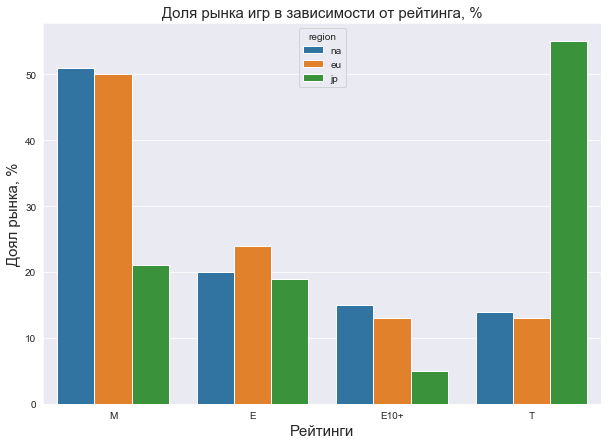

In [104]:
plt.figure(figsize=(10,7))
sns.barplot(x="rating", y="value", hue = 'region',  data=df1)
plt.title('Доля рынка игр в зависимости от рейтинга, %', size = 15)
plt.ylabel('Доял рынка, %', size = 15) # подпись по оси y
plt.xlabel('Рейтинги', size = 15) # подпись по оси y
plt.show()

График отображает все выдоды, сделанные ранее. Видна Японская аномалия в распределении рейтингов. Разные культуры, разныве ценности и предпочтения, вкусы пользователей

# Шаг 6. Проведите исследование статистических показателей

## Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

In [105]:
genres = list(df.genre.unique())  #Уникальный список жанров
genres

['Action',
 'Shooter',
 'Role-Playing',
 'Misc',
 'Sports',
 'Fighting',
 'Racing',
 'Simulation',
 'Platform',
 'Strategy',
 'Adventure',
 'Puzzle']

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Дисперсию также стоит вывести. Нас об этом просит заказчик. 

</div>

Дисперсию также добавили

In [106]:
# Выведем информацию в текстовом виде по жанрам и рейтингам
vars1 = []
vars2 = []
sts1=[]
ms1=[]
sts2=[]
ms2=[]
for i in genres:
    df1 = df[df.genre == i]
    m1 = round(df1.critic_score.mean(),1)
    m2 = round(df1.user_score.mean(),1)
    st1 = round(df1.critic_score.std(),1)
    st2 = round(df1.user_score.std(),1)
    var_s1 = round(df1.critic_score.var(),1)
    var_s2 = round(df1.user_score.var(),1)
    print(f'Жанр {i}, оценки критиков, среднее = {m1}, стандартное отклонение  = {st1}, дисперсия = {var_s1}')
    print(f'Жанр {i}, оценки пользователей, среднее = {m2}, стандартное отклонение  = {st2}, дисперсия = {var_s2}')

    print('-------')

    sts1.append(st1)
    sts2.append(st2)
    ms1.append(m1)
    ms2.append(m2)

Жанр Action, оценки критиков, среднее = 71.5, стандартное отклонение  = 11.9, дисперсия = 141.3
Жанр Action, оценки пользователей, среднее = 6.8, стандартное отклонение  = 1.3, дисперсия = 1.8
-------
Жанр Shooter, оценки критиков, среднее = 72.8, стандартное отклонение  = 12.8, дисперсия = 163.5
Жанр Shooter, оценки пользователей, среднее = 6.3, стандартное отклонение  = 1.5, дисперсия = 2.2
-------
Жанр Role-Playing, оценки критиков, среднее = 73.5, стандартное отклонение  = 11.8, дисперсия = 139.6
Жанр Role-Playing, оценки пользователей, среднее = 7.4, стандартное отклонение  = 1.2, дисперсия = 1.5
-------
Жанр Misc, оценки критиков, среднее = 73.3, стандартное отклонение  = 8.9, дисперсия = 79.8
Жанр Misc, оценки пользователей, среднее = 7.0, стандартное отклонение  = 1.2, дисперсия = 1.4
-------
Жанр Sports, оценки критиков, среднее = 71.7, стандартное отклонение  = 16.3, дисперсия = 266.8
Жанр Sports, оценки пользователей, среднее = 5.2, стандартное отклонение  = 1.8, дисперсия =

In [107]:
#Приведем таблицу к виду удобному для визуализации
df2 = df.melt(id_vars=['genre'], value_vars=['critic_score', 'user_score'], var_name='scores')
df2.scores = df2.scores.map(lambda x: x.split('_')[0])
df2

,genre,scores,value
0,Action,critic,97.0
1,Action,critic,97.0
2,Shooter,critic,NaN
3,Role-Playing,critic,NaN
4,Action,critic,97.0
...,...,...,...
4479,Adventure,user,NaN
4480,Misc,user,NaN
4481,Action,user,NaN
4482,Adventure,user,NaN


In [108]:
#Приводим таблицу к виду, удобному для визуализации
df2 = df2.groupby(['genre','scores'], as_index=False).aggregate({'value':'mean'})
df2

,genre,scores,value
0,Action,critic,71.452229
1,Action,user,6.836667
2,Adventure,critic,72.638298
3,Adventure,user,7.408197
4,Fighting,critic,69.595238
5,Fighting,user,7.037500
6,Misc,critic,73.279070
7,Misc,user,6.975000
8,Platform,critic,73.823529
9,Platform,user,6.713793


In [109]:
#Для сравнения приведем оценки критиков и пользователей к 100 балльной системе

for i in range(df2.shape[0]):
    if df2.loc[i, 'scores'] == 'user':
        
        df2.iloc[i, 2] = df2.iloc[i, 2]*10
df2

,genre,scores,value
0,Action,critic,71.452229
1,Action,user,68.366667
2,Adventure,critic,72.638298
3,Adventure,user,74.081967
4,Fighting,critic,69.595238
5,Fighting,user,70.375000
6,Misc,critic,73.279070
7,Misc,user,69.750000
8,Platform,critic,73.823529
9,Platform,user,67.137931


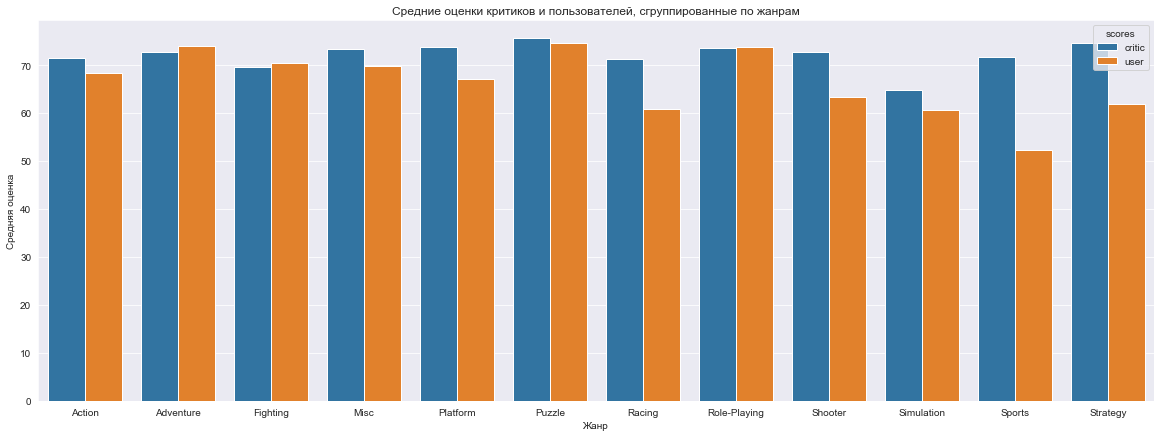

In [110]:
plt.figure(figsize=(20,7))
sns.barplot(x="genre", y="value", hue = 'scores',  data=df2)
plt.title('Средние оценки критиков и пользователей, сгруппированные по жанрам')
plt.ylabel('Средняя оценка') # подпись по оси y
plt.xlabel('Жанр') # подпись по оси y
plt.show()

На диаграмме представлены средние оценки, сгруппированные по критикам и пользователям, а также по жанрам для сравнения их средних значенийц. Ролевые и стратегии имеют максимальную оценку, симуляторы - минимальную.

Как правило оценка пользователей либо сопоставима либо меньше оценки критиков

In [111]:
#Приведем таблицу к виду удобному для визуализации
df2 = df.melt(id_vars=['name','genre'], value_vars=['critic_score', 'user_score'], var_name='scores').rename(columns = {'value':'my_values'})
df2.scores = df2.scores.map(lambda x: x.split('_')[0])
df2

,name,genre,scores,my_values
0,Grand Theft Auto V,Action,critic,97.0
1,Grand Theft Auto V,Action,critic,97.0
2,Call of Duty: Black Ops 3,Shooter,critic,NaN
3,Pokemon X/Pokemon Y,Role-Playing,critic,NaN
4,Grand Theft Auto V,Action,critic,97.0
...,...,...,...,...
4479,Strawberry Nauts,Adventure,user,NaN
4480,Aiyoku no Eustia,Misc,user,NaN
4481,Samurai Warriors: Sanada Maru,Action,user,NaN
4482,Haitaka no Psychedelica,Adventure,user,NaN


In [112]:
#Для сравнения приведем оценки критиков и пользователей к 100 балльной системе

for i in range(df2.shape[0]):
    if df2.loc[i, 'scores'] == 'user':
        
        df2.iloc[i, 3] = df2.iloc[i, 3]*10
df2

,name,genre,scores,my_values
0,Grand Theft Auto V,Action,critic,97.0
1,Grand Theft Auto V,Action,critic,97.0
2,Call of Duty: Black Ops 3,Shooter,critic,NaN
3,Pokemon X/Pokemon Y,Role-Playing,critic,NaN
4,Grand Theft Auto V,Action,critic,97.0
...,...,...,...,...
4479,Strawberry Nauts,Adventure,user,NaN
4480,Aiyoku no Eustia,Misc,user,NaN
4481,Samurai Warriors: Sanada Maru,Action,user,NaN
4482,Haitaka no Psychedelica,Adventure,user,NaN


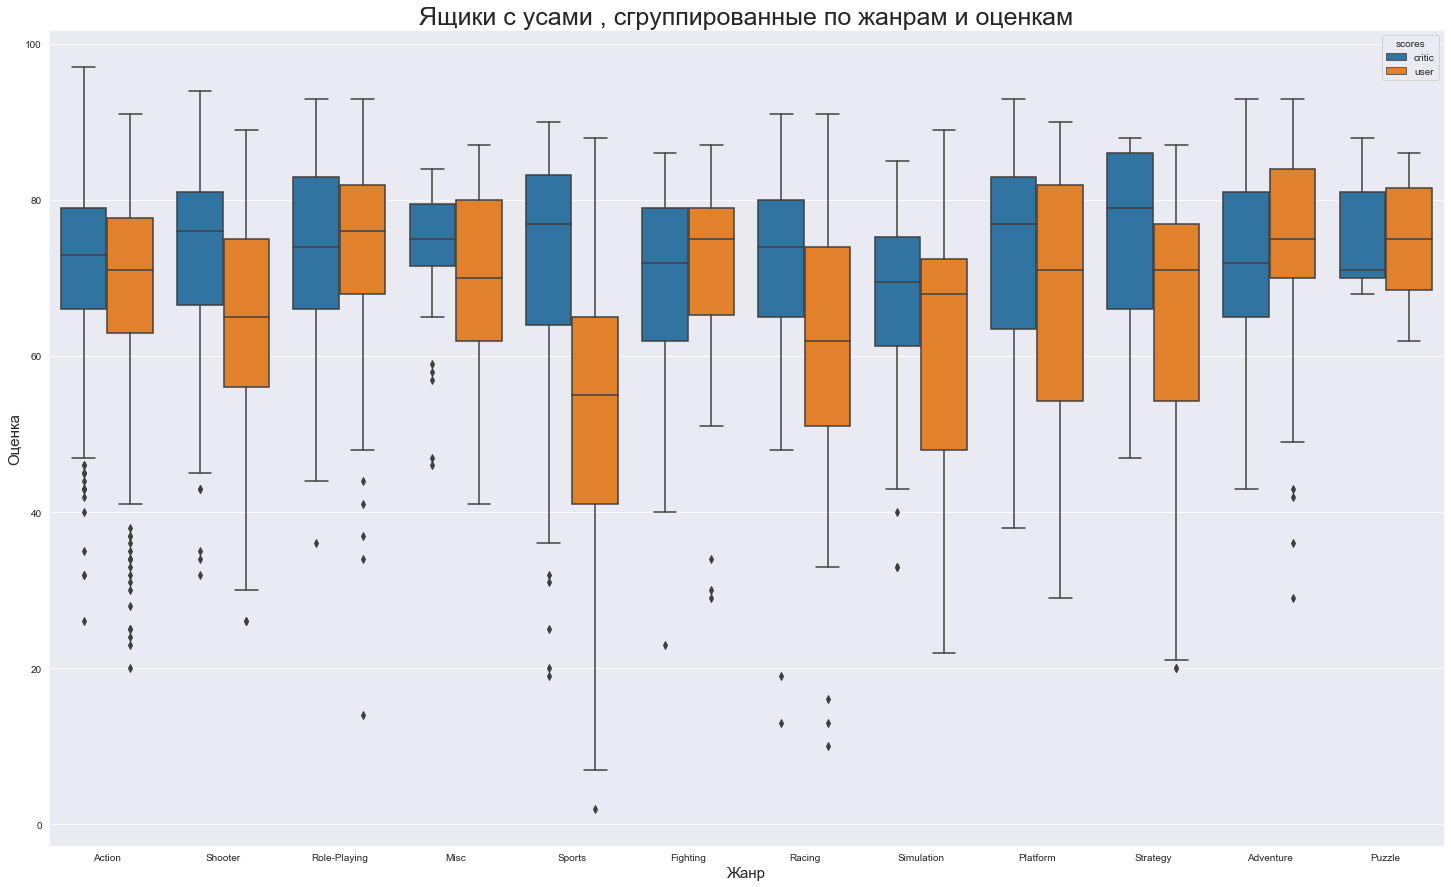

In [113]:
#Печатаем график, изображающий ящики с умами сгруппированные по жанрам и оценкам критиков.

plt.figure(figsize=(25,15))

# график boxplot показывает средний, нижний и верхний квартили, 
# минимальное и максимальное значение выборки и выбросы
sns.boxplot(data=df2,  y = 'my_values', x = 'genre',   orient='v', hue = 'scores')
plt.title('Ящики с усами , сгруппированные по жанрам и оценкам', size = 25)
plt.xlabel('Жанр', size = 15)
plt.ylabel('Оценка', size = 15)
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Классный график 👍 

</div>

Данный график визуализирует средние (медианы) и стандартные отклонения каждого жанра и типа оценок

Наибольшие просадки оценок по спорту

Большинство оценок сконцентрировано в диапазоне от 59 до 82.

Наилучие оценки у ролевых игр, наихудшие у симуляторов.

Построим гистограммы:

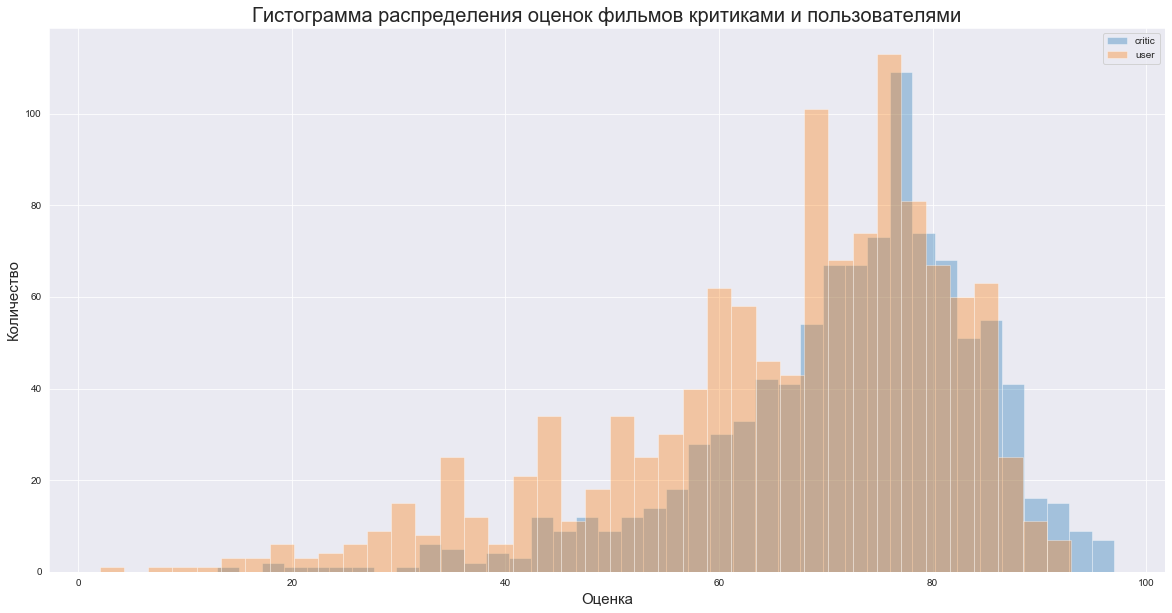

In [114]:
# Гистограммы оценок критиков и пользователей для всех игр

plt.figure(figsize=(20,10)) # задаем размер полотнаtarget_names = pd.Series(df.target_names.unique())
for i in df2.scores.unique():
    mask = df2.scores==i
    temp = df2.loc[mask,'my_values']
    temp = temp.dropna()
    plt.hist(temp, bins=40,label=i, alpha=0.35) # параметр bins отвечает за количество подгрупп, в которые объединяются данные
plt.title(f'Гистограмма распределения оценок фильмов критиками и пользователями', size = 20)
plt.xlabel('Оценка', size = 15)
plt.ylabel('Количество', size = 15)
plt.legend()
plt.show()

Гистограммы имеют схожую геометрию. В оценках пользователей более четкий пик, тогда как в оценках критиков некое "плато" на вершине гистограммы. 

Оценка за игру ниже 60 можно считать провальной, по сравнению с общей тенденцией. Оценку выше 80 - очень хорошей и даже отличной.Критики ставят максимальные оценки, тогда как пользователи меньше. Гистограмма пользоватеелй в целом смещена влево. 

Ширина гистограмм говорит о примерном равенстве их дисперсий и стандартных отклонений. распределения центральные, имеют ярко выраженый хвост в направлении к 0. Не являются нормальными визуально

In [115]:
df2.head()

,name,genre,scores,my_values
0,Grand Theft Auto V,Action,critic,97.0
1,Grand Theft Auto V,Action,critic,97.0
2,Call of Duty: Black Ops 3,Shooter,critic,NaN
3,Pokemon X/Pokemon Y,Role-Playing,critic,NaN
4,Grand Theft Auto V,Action,critic,97.0


In [116]:
#Рассчитаем среднее и стандартыне отклонения этих двух распределений

for i in df2.scores.unique():
  x = df2[df2.scores==i].iloc[:,3]
  m = round(x.mean(),1)
  st = round(x.std(),1)
  print(f'Для оценок {i} среднее равно {m}, стандартное отклонение равно {st}')

Для оценок critic среднее равно 72.0, стандартное отклонение равно 12.8
Для оценок user среднее равно 65.8, стандартное отклонение равно 16.1


Таким образом получили среднее значение оценок пользователей меньше, чем среднее по критикам, что было ожидаемо. Стандартные отклонения по польтзователям выше на 1, что говорит о большей изменчяивости и вариантивности оценок пользователей в сравнении с оценками критиков

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Анализ проведен. Как думаешь, почему мы получаем скошенные влево распределения для большинства жанров?

</div>

# Шаг 7. Проверьте гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;



In [117]:
#Формируем 2 numpy вектора для сравнения их средних

df1 = df.iloc[:,[1,9]]
x1 = df1[df1.platform=='XOne'].dropna().user_score.values       #XOne
x2 = df1[df1.platform=='PC'].dropna().user_score.values         #PC

#Рассчитаем статистические характеристики двух распределений
print(f'x1: mean = {round(x1.mean(),1)}, std = {round(x1.std(),1)}')
print(f'x2: mean = {round(x2.mean(),1)}, std = {round(x2.std(),1)}')

x1: mean = 6.5, std = 1.4
x2: mean = 6.3, std = 1.7


Предположения

Наблюдения в каждой выборке независимы и одинаково распределены .
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.

интерпретация:

нулевая гипотеза - выборки принадлежат одной ГС
альтернативная гипотеза - выборки принадлежат разным ГС

Применяемый критерий Стьюдента.

In [118]:
#Критерий Стьюдента
from scipy.stats import ttest_ind
stat, p = ttest_ind(x1, x2)
print(f'stat = {stat}')
print(f'p-value = {p}')

#Пороговый уровень значимости установим как 0.05. 
#Нулевая гипотеза не оппровергнута, уровень значимиости более чем в 2 раза выше порогового


stat = 1.4788255981357277
p-value = 0.14012658403611647


Нулевая гипотеза не отвергнута, значит существует рассчитанная вероятность что средние одинаковые.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно. Только Т-тест проверяет равенство средних выборок. Именно об этоом и стоит прописать в формулировках гипотез.

</div>

## Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [119]:
#Формируем 2 numpy вектора для сравнения их средних

df1 = df.iloc[:,[3,9]]
x1 = df1[df1.genre=='Action'].dropna().user_score.values    #Action
x2 = df1[df1.genre=='Sports'].dropna().user_score.values    #Sportd

#Рассчитаем статистические характеристики двух распределений
print(f'x1: mean = {round(x1.mean(),1)}, std = {round(x1.std(),1)}')
print(f'x2: mean = {round(x2.mean(),1)}, std = {round(x2.std(),1)}')

x1: mean = 6.8, std = 1.3
x2: mean = 5.2, std = 1.8


Предположения

Наблюдения в каждой выборке независимы и одинаково распределены .
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.

интерпретация:

нулевая гипотеза - выборки принадлежат одной ГС
альтернативная гипотеза - выборки принадлежат разным ГС

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Импорт необходимых библиотек следует производить в первой ячейке работы, как то рекомендует стандарт. 

</div>

In [120]:
#Критерий Стьюдента
from scipy.stats import ttest_ind
stat, p = ttest_ind(x1, x2)
print(f'stat = {stat}')
print(f'p-value = {p}')

#Пороговый уровень значимости установим как 0.05. Нулевая гипотеза отклонена (p-value запредельно низкий практически нулевой)


stat = 11.543156080325684
p-value = 9.645978111716946e-28


Таким образом средние пользовательские рейтинги жанров Экшн и Спорт разные. Средняя Экшена выше.  

Они принадлежат разным ГС

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Проверка второй гипотезы также осуществлена без нареканий. 

</div>

# Шаг 8. Общие выводы

База данных представляет собой таблицу в формате .csv. В таблице 16715 строк и 11 столбцов. Из них полностью заполнены : platform, na_sales, eu_sales, jp_sales, other_sales, остальные имеют пропущенные значения. 

Столбцы с названием игры, годом выпуска были обработаны, пропущенные значения заполнены. Пропущенные года выпуска игры заменены средним годом выпуска конкретной платформы, к которой относится игра. Были отредактированы типы данных столбцов, чтобы числовые типы соответсвовали числовым столбцам, а тип Object соответствовал текстовым столбцам.

Изначально характерные зависимости и распределеняи в исходной таблице были визуализированы в виде графиков и даиграмм, чтобы понимать характер распределений.

Характер зависимости продаж от оценок критиков и оценок пользователей говорит о том, что зависимость есть (гипотеза была проверена) она нелинейна (было подобрано уравнение зависимости и оптимальная степенная функция), значение корреляции достигало 43%. Это слабая зависимость. Вид графика скаттерплота говорит о том, что продажи зависят не только от оценок критиков и пользователей игр, есть другие важные факторы (возможно маркетинг, продажи, звездный состав фильмов, и прочее, не отраженное в таблице). У платформ с меньшей популярностью отсутствует существенная зависимость продаж от оценок критиков. Это отчетливо видно на графикаъх XOne и PSV. Посколкьу при высоких оценках и рейтингах продажи могут быть как провальными, так и рекордными. Изменчивость не стационарная, растет с ростом оценок критиков.

В популярных платформах играют роль оценки критиков и потзователей. Продажи растут просто экспоненциально сопоставимо со степенью числа 30. В менее популярных платформах зависимости похуже либо отсутствуют. Возможно это связано с тем что меньше людей читаю отзывы критиков перед покупкой игры. Скорее фанаты платформ.

Все развитие игр можно разбить на 3 этапа: до 1990 года, начиная с 90-х годов пошел основной рост производства и популярности игр до  2009 г, и спад 2009 - 2016.

У каждой платформы есть свой жизненный цикл. Он меняется от 1 до 9 лет, в среднем 5-6 лет. Жизненный цикл определеялся ьпо собственной метрике: падение пиковых значений 90% будем считать концом жизни платформы.  Платформы, популярные в прошлом, у которых сейчас продажи на нуле: PS, PS2, PS3, Wii. Хотя сейчас все платформы находятся на спаде и в просадке. Особняком стоит PC -  платформа универсальная, которая не подвержена трендорвым колебаниям, по сравнению с другими платформами, ее жизненный цикл далек от угасания.

Платформы по поулярности можно разбить на кластеры: 6 топовых платформ с оборотом более 150 и все остальные с оборотом менее 100. Получилась очень интересная зависимость, похожая на логарифм. Чем больше максимальные продажи, тем дольше время жизни. Однако зависимость не линейная, она стремится к какому-то пределу, что логично. Какой бы успешной игра не была,пользователям она приедается и рано или поздно интерес к ней спадает. Так же и платформы - прогресс развивается, пояляются новые технологии, которые вытесняют старые, даже самые успешные платформы не могу вечно быть в лидерах рейтинга. В итоге: топовые платформы живут более 7 лет, аутсайдеры порядка 4 лет, 

Дальнейший анализ текущего состояния производился нга периоде от 2008 до 2016 г, как последнем этапе развития игр (спад). 
За последние 2 года есть явный лидер по продажам:  PS4, на уверенном втором месте идет XOne, и так же на уверенном 3 месте 3DS. За последние 3 года все продажи падали, лишь XOne из лидеров немного вырос с 2014 по 2015 гг. Если смотреть рост-падение в процентном отношении, то наиболее достойно выглядят PSV и PC  в последние 3 года. В абсолютном выражении конечно лидер PS4, он падает, но все равно занимает существенный сегмент рынка.

Несмотря на наличие флагманских игр, они являются выбросами и выбиваются из общей совокупности, их следует рассматрвиать отдельно. Основная масса игр имеет схожие распределения. Так, можно выделить в первый кластер следующие платформы: X360, PS3, PS4, XOne. У них схожие характеристики, сопоставимые прибыльности игр. Однако медианная прибьльность у X360 все таки выше. Платформы семейства PS*** берут количеством, они и меют рекордные суммарные проадажи благодаря обилию игр, но как видим медианные доходности у них равны прмерно. Более того новейшая PS4 имеет самую низкую медианную доходность с 1 игры. Следующий кластер - Wii, 3DS - делят второе место. Аутсайдеры по средней дорходности - PC, PSP, PSV. На этих платформах производители игр зарабатывают меньше всего, и скорее всего менее охотно производят игры для этих платформ, что показывали графики сверху в ранних заданиях.\

Если брать суммарыне продажи за 9 лет, тот тут интересная ситуация: лидеры по медианной доходности PS3, X360. Затем идут Wii, PS4, XOne, WiiU. Ну и дальше все остальные. Опять же, есть разные игры - успешные, средние и слабые.

Статистика по жанрам: Жанры Экшн, Шутер и Спорт собирают самые большие продажи. Стратегии и паззлы - аутсайдеры. 

Анализируя видим схожесть рынков Америки и Европы. В четверке Экшн, Шутер, Спорт, Misc.Доли рынка лидера порядка 26-29%, 2-3 места занимают по 15-18% рынка, остальные жанры в сильном отрыве от них.Рынок Японии своеобразный. Однако Экшн, Спорт, Misc все равно расположены в пятерке популярных жанров. Лидирует Role-Playing, с рекордной долей рнынка в 30%, у Экшена 23%, остальные доли жанров не существенны по сравнению с ТОП 2.

В Америке и Европе в ТОП X360, PS3, Wii, PS4. Это схожие рынки, но конечно продажи в америке практически в 2 раза выше чем в европе. Рынок японии сильно отличается. Здесь в топе из тех же платформ только PS3, Wii и все. Зато платформа 3DS лидирует и PSP тройке. Все таки в Японии хорошо продвигаются портативные игровые платформы. Продажи в японии примерно в 3 раза меньше европейских. Лидер рынка имеет 26-30% доли, вторая платформа имеет порядка 20% долю рынка, а третья платформа 17-21% рынка региона.

Видим, что рейтинги ESRB всегда в ТОП 3 независимо от региона, влияет. И опять схожесть Европы и Америки и Япония идет особняком, но здесь в случае с рейтингом все таки есть сходства.

Анализ оценок рейтингов по жанрам: Наибольшие просадки оценок по спорту. Большинство оценок сконцентрировано в диапазоне от 59 до 82.Наилучие оценки у ролевых игр, экшен, наихудшие у симуляторов. 

Гистограммы оценок критиков и пользователей имеют не нормальное распределение, левый вытянутый хвост распределения. Дисперсия оценок пользователей выше, посколкьу пользователи более разномастные, гистограмма шире.Имеет более отчетливый пик, в отличие от гистограммы критиков. Пик отсутствует, скорее плато.

После применения статистического t-теста Стьюдента, выяснили, что:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. Еще лучше будет, если приведешь рекомендации для компании по дальнейшим действиям. 

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Круто, что ты вообще используешь данную библиотеку. 

Ты проделала большую работу, молодец! Критических замечаний немного. Однако с ними важно разобраться и их исправить. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>